# Machine Learning Group 8

# 1. Imports

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pointbiserialr
from sklearn import metrics


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import  SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier


import time
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


### Import Datasets

In [3]:
train = pd.read_csv('train.csv', sep = ',')
train.head(5)

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [4]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,71226,71227,71228,71229,71230,71231,71232,71233,71234,71235
encounter_id,533253,426224,634063,890610,654194,269878,182051,964239,418598,760130,...,716532,537873,892479,288699,758007,660160,826429,332030,757560,459757
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
patient_id,70110,29775006,80729253,2919042,84871971,279288,1566405,60052095,85756257,96104214,...,42451245,23904909,82494909,102008835,65777877,24531381,4663818,23397147,52161750,88410897
race,Caucasian,AfricanAmerican,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Other,Caucasian,Caucasian,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Male,Female,Male,Female,Female,Female,Male,Female,Female,...,Male,Female,Female,Male,Female,Female,Female,Female,Male,Male
age,[70-80),[50-60),[60-70),[60-70),[70-80),[50-60),[50-60),[70-80),[50-60),[70-80),...,[60-70),[80-90),[70-80),[70-80),[70-80),[80-90),[70-80),[60-70),[60-70),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
payer_code,?,?,?,MC,HM,?,UN,MC,MC,MC,...,MC,?,?,?,MC,MC,?,?,BC,BC
outpatient_visits_in_previous_year,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,3,0,0,0,0,0
emergency_visits_in_previous_year,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,2,0,0


In [3]:
df_test = pd.read_csv('test.csv', sep = ',')
df_test.head(5)

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


# 2. Data Pre Processing

### 2.1 Train-Validation Split

In [4]:
df = train.copy()

In [5]:
X = df.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y= df['readmitted_binary']

In [6]:
X_train, X_val, y_train_binary, y_val_binary = train_test_split(X, y, train_size=0.8, random_state=42)

### 2.2 Visualization

#### 2.2.1 Numerical Features

In [7]:
metric_features = []
for col in X_train.columns:
    if X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64':
        metric_features.append(col)

print("Metric:", metric_features)

Metric: ['encounter_id', 'patient_id', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']


##### 2.2.1.1 Outpatient, Emergency, Inpatient Visits

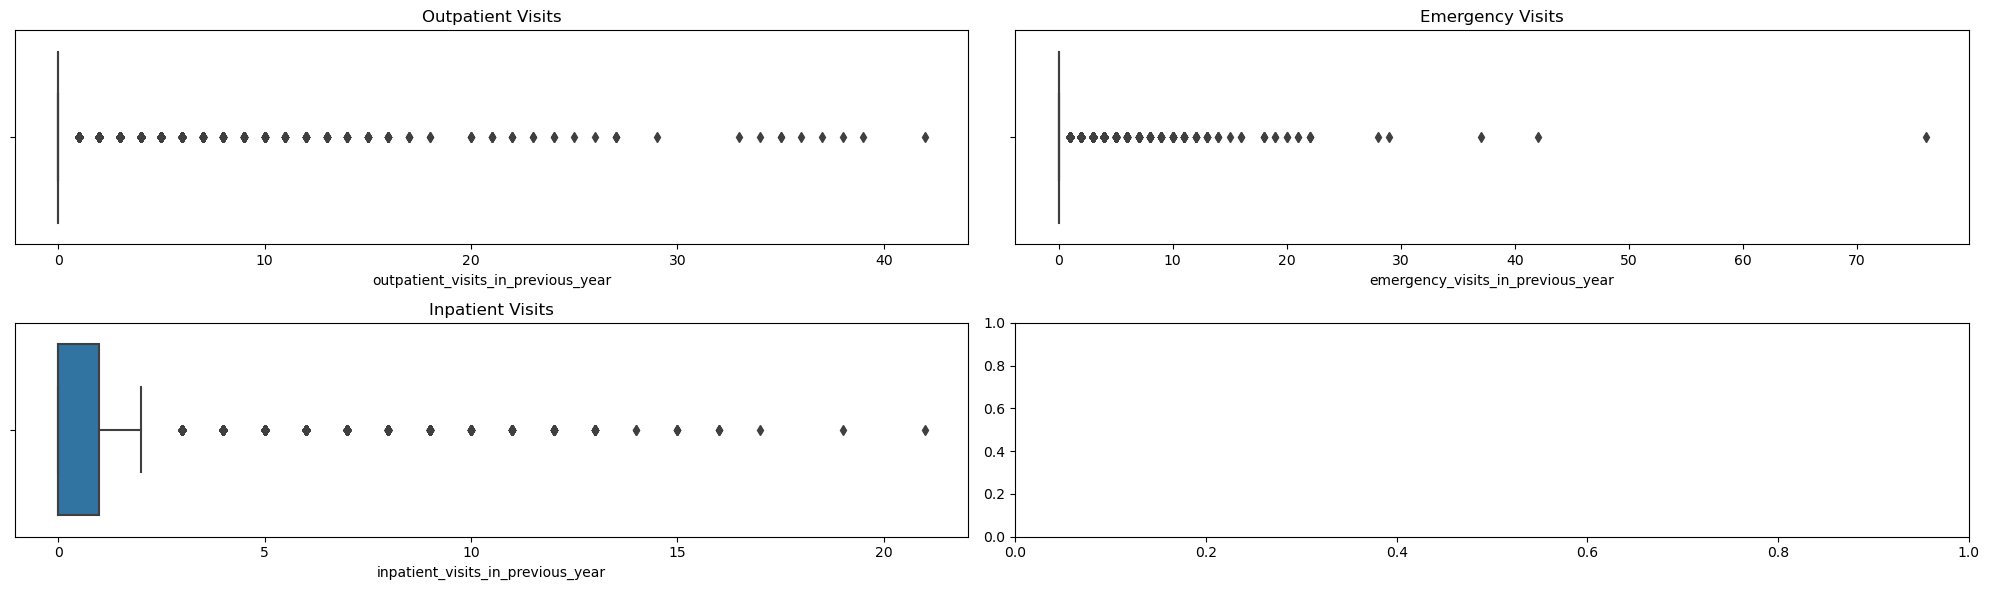

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 6))

sns.boxplot(ax = axes[0][0], data = X_train, x = 'outpatient_visits_in_previous_year')
axes[0][0].set_title('Outpatient Visits')
sns.boxplot(ax = axes[0][1], data = X_train, x = 'emergency_visits_in_previous_year')
axes[0][1].set_title('Emergency Visits')
sns.boxplot(ax = axes[1][0], data = X_train, x = 'inpatient_visits_in_previous_year')
axes[1][0].set_title('Inpatient Visits')


plt.tight_layout()
plt.show()

##### 2.2.1.2 average_pulse_bpm, length_of_stay_in_hospital, number_of_medications, number_diagnoses, number_lab_tests, non_lab_procedures

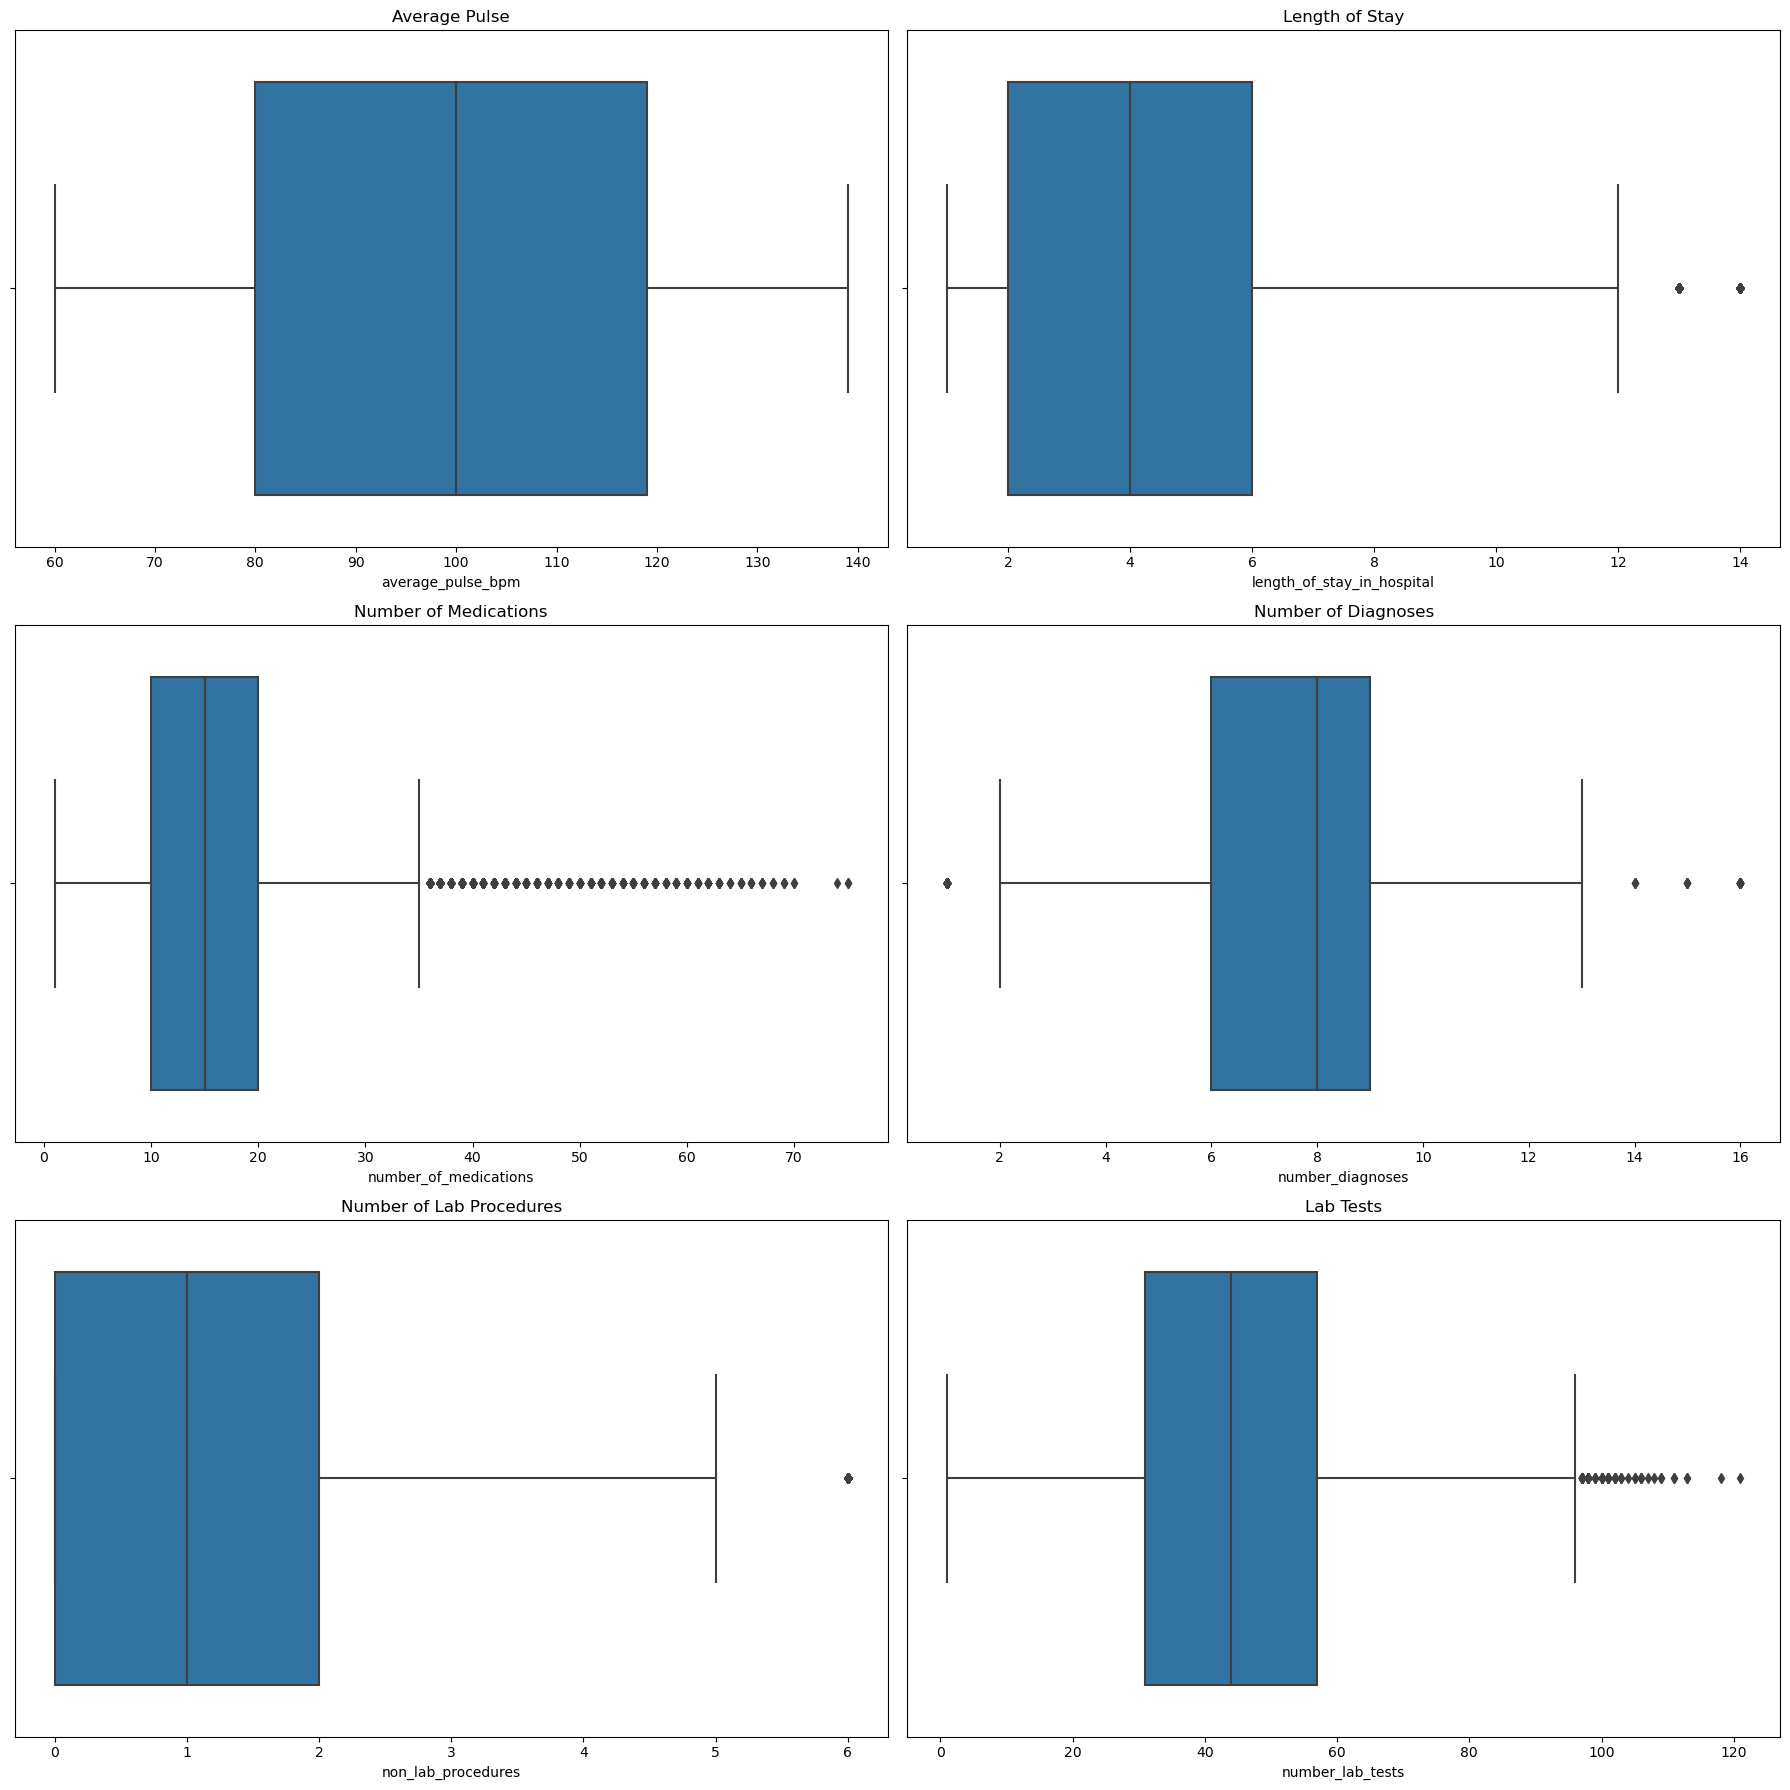

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot the MNT features
sns.boxplot(ax=axes[0][0], data=X_train, x='average_pulse_bpm')
axes[0][0].set_title('Average Pulse')
sns.boxplot(ax=axes[0][1], data=X_train, x='length_of_stay_in_hospital')
axes[0][1].set_title('Length of Stay')
sns.boxplot(ax=axes[1][0], data=X_train, x='number_of_medications')
axes[1][0].set_title('Number of Medications')
sns.boxplot(ax=axes[1][1], data=X_train, x='number_diagnoses')
axes[1][1].set_title('Number of Diagnoses')
sns.boxplot(ax=axes[2][0], data=X_train, x='non_lab_procedures')
axes[2][0].set_title('Number of Lab Procedures')
sns.boxplot(ax=axes[2][1], data=X_train, x='number_lab_tests')
axes[2][1].set_title('Lab Tests')

plt.tight_layout()
plt.show()

#### 2.2.2 Categorical Features

In [10]:
non_metric_features = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        non_metric_features.append(col)

print("Non-metric:", non_metric_features)

Non-metric: ['country', 'race', 'gender', 'age', 'weight', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'medication']


In [11]:
# value counts for all non-metric features
for col in non_metric_features:
    print(X_train[col].value_counts())
    print()

country
USA    56988
Name: count, dtype: int64

race
Caucasian          40524
AfricanAmerican    10210
?                   1224
Hispanic            1082
Other                803
Asian                340
Name: count, dtype: int64

gender
Female             30601
Male               26384
Unknown/Invalid        3
Name: count, dtype: int64

age
[70-80)     13906
[60-70)     11953
[50-60)      9209
[80-90)      9169
[40-50)      5087
[30-40)      2039
[90-100)     1487
[20-30)       842
[10-20)       382
[0-10)         87
Name: count, dtype: int64

weight
?            55165
[75-100)       740
[50-75)        520
[100-125)      373
[125-150)       80
[25-50)         56
[0-25)          28
[150-175)       17
[175-200)        7
>200             2
Name: count, dtype: int64

payer_code
?     22529
MC    18121
HM     3445
SP     2788
BC     2674
MD     1990
CP     1432
UN     1403
CM     1099
OG      604
PO      317
DM      301
WC       79
CH       78
OT       48
MP       47
SI       32
FR        1

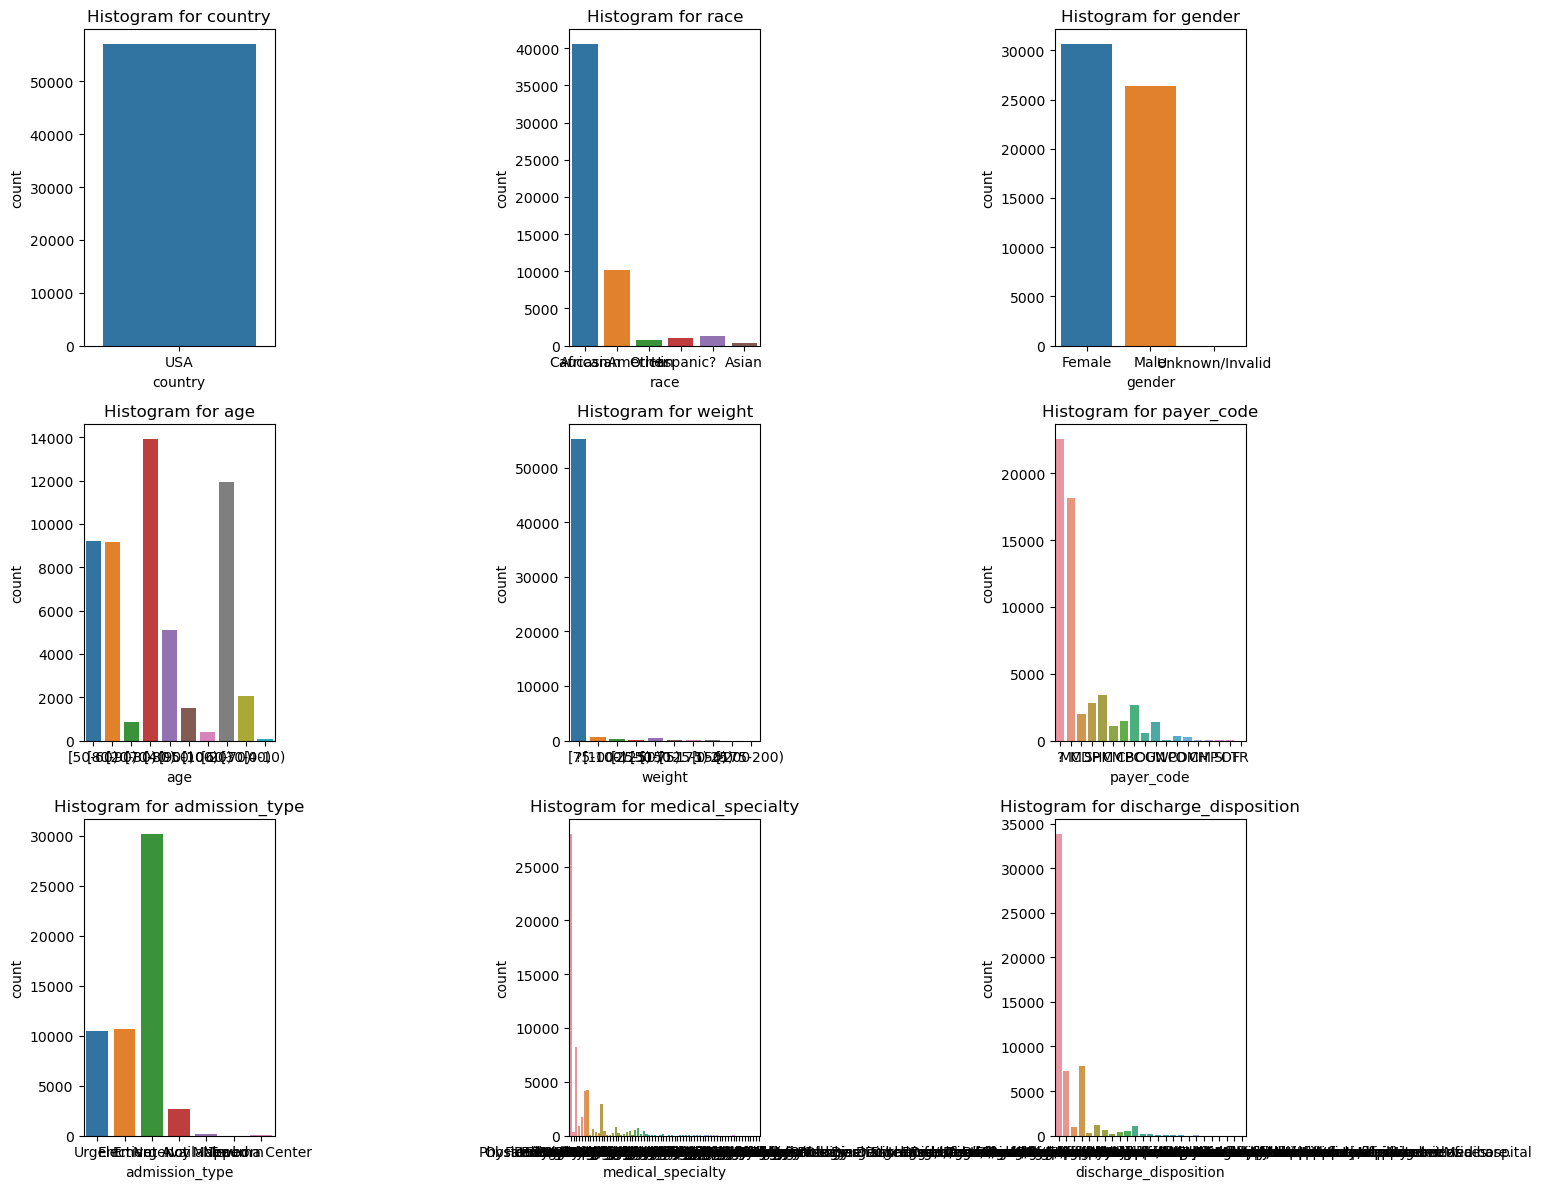

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

# Plot histograms for the first 9 features
for i, feature in enumerate(non_metric_features[:9]):
    sns.countplot(data=X_train, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


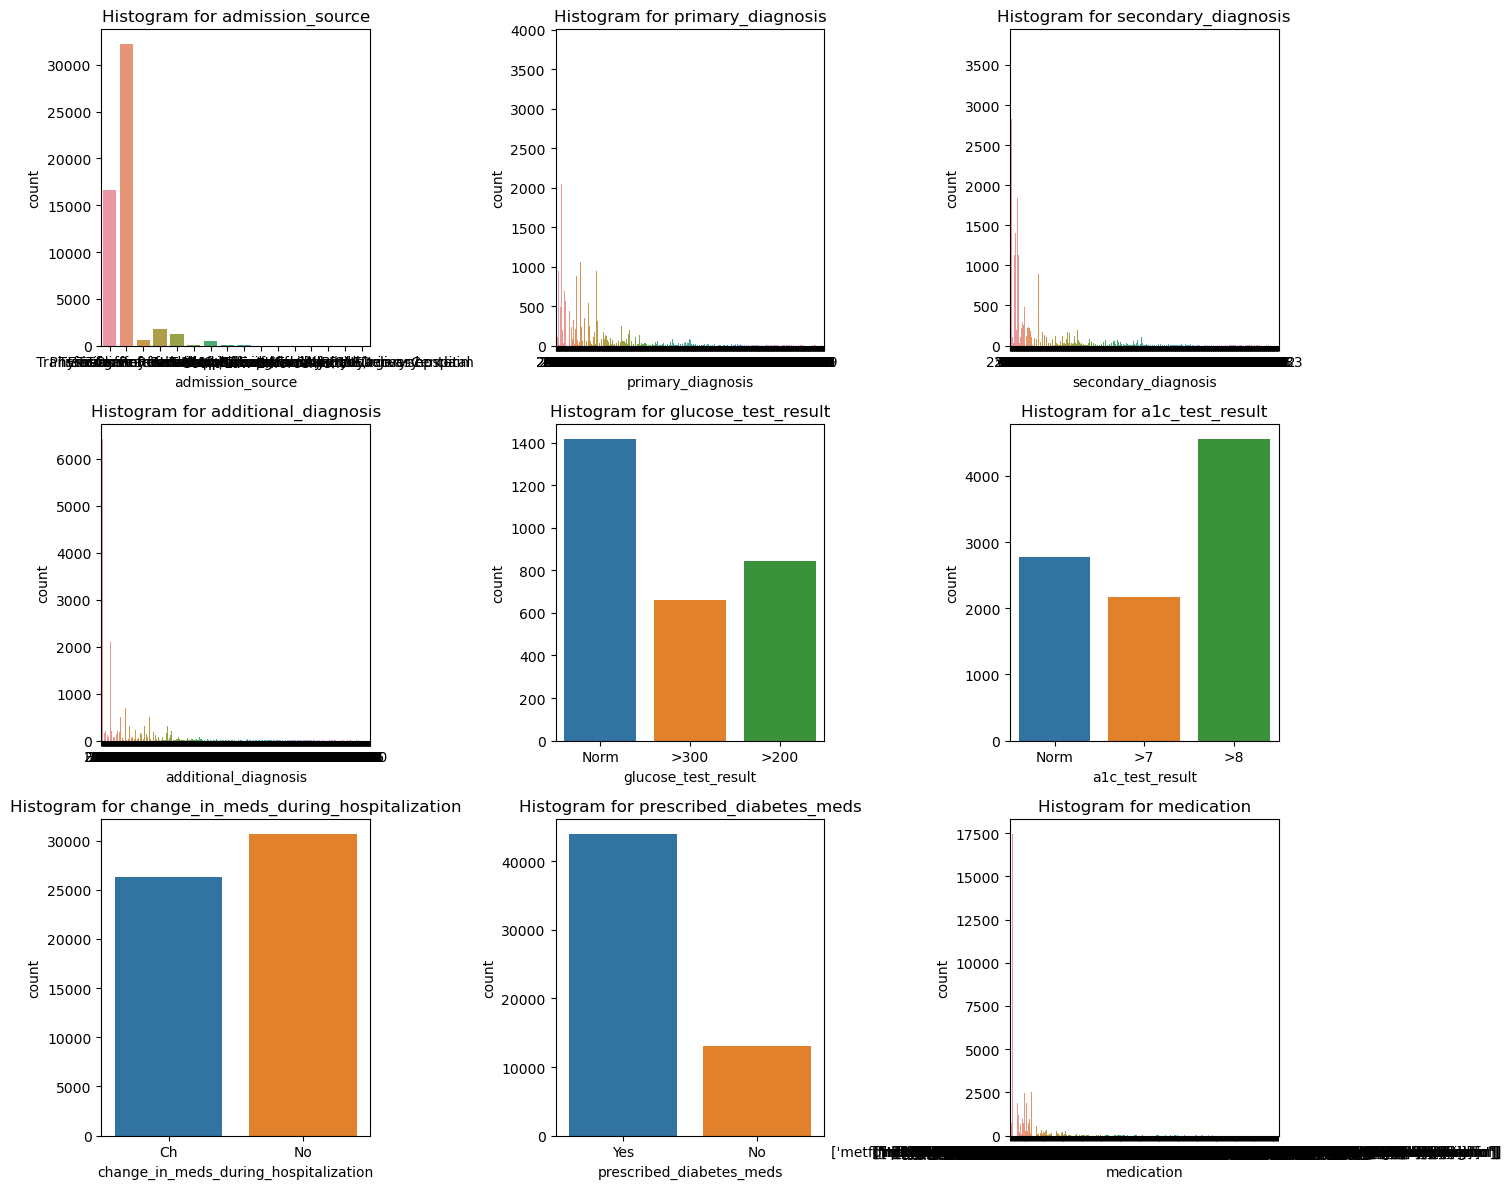

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

# Plot histograms for the last 9 features
for i, feature in enumerate(non_metric_features[9:]):
    sns.countplot(data=X_train, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 2.3 Outliers

In [14]:
df_outliers = X_train.copy()
df_outliers_val = X_val.copy()
df_outliers_test = df_test.copy()

#### 2.3.1 Manual Outliers

In [15]:
df_outliers.columns

Index(['encounter_id', 'country', 'patient_id', 'race', 'gender', 'age',
       'weight', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')

In [16]:
def outliers_to_nan(df_outliers, columns_and_thresholds):
    for column, threshold in columns_and_thresholds.items():
        if column == 'number_diagnoses':
            condition = (df_outliers[column] > threshold) | (df_outliers[column] == 1)
        else:
            condition = df_outliers[column] >= threshold
        df_outliers.loc[condition, column] = None  

columns_and_thresholds = {
    'number_of_medications': 70,
    'length_of_stay_in_hospital': 14,
    'number_diagnoses': 14,
    'number_lab_tests': 111,
    'outpatient_visits_in_previous_year': 30,
    'emergency_visits_in_previous_year': 25,
    'inpatient_visits_in_previous_year': 19,
}

for df in [df_outliers, df_outliers_val, df_outliers_test]:
    outliers_to_nan(df, columns_and_thresholds)

original_size = df_outliers.shape[0]
percentage_outliers = round(df_outliers[list(columns_and_thresholds)].isna().sum().sum() / original_size * 100, 2)
print('Percentage of outliers in total:', percentage_outliers, '%')

for df in [df_outliers, df_outliers_val, df_outliers_test]:
    df[metric_features] = df[metric_features].fillna(df[metric_features].mode().iloc[0])


Percentage of outliers in total: 1.36 %


#### 2.3.2 IQR Outliers

In [17]:
q25 = df_outliers[metric_features].quantile(.25)
q75 = df_outliers[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_outliers[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, axis=0), index=df_outliers.index)
df_2 = df_outliers[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_outliers.shape[0], 4)* 100, '%')

Percentage of data kept after removing outliers: 66.72 %


### 2.4 Missing Values

In [18]:
df_Nan = df_outliers.copy()
df_Nan_val = df_outliers_val.copy()
df_Nan_test = df_outliers_test.copy()

In [19]:
df_Nan.drop_duplicates(inplace=True)
df_Nan_val.drop_duplicates(inplace=True)
df_Nan_test.drop_duplicates(inplace=True)

In [20]:
df_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56988 entries, 43545 to 15795
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   encounter_id                           56988 non-null  int64  
 1   country                                56988 non-null  object 
 2   patient_id                             56988 non-null  int64  
 3   race                                   54183 non-null  object 
 4   gender                                 56988 non-null  object 
 5   age                                    54161 non-null  object 
 6   weight                                 56988 non-null  object 
 7   payer_code                             56988 non-null  object 
 8   outpatient_visits_in_previous_year     56988 non-null  float64
 9   emergency_visits_in_previous_year      56988 non-null  float64
 10  inpatient_visits_in_previous_year      56988 non-null  float64
 11  adm

In [21]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      4.922089
gender                                    0.000000
age                                       4.960693
weight                                    0.000000
payer_code                                0.000000
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.204604
medical_specialty                         0.000000
average_pulse_bpm                         0.000000
discharge_disposition                     3.646382
admission_source                          6.613673
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

In [22]:
w_r = ['?', '', 'Unknown/Invalid']
for r in w_r:
    for column in df_Nan.columns:
        df_Nan[column] = df_Nan[column].replace(r, np.nan)
        df_Nan_val[column] = df_Nan_val[column].replace(r, np.nan)
        df_Nan_test[column] = df_Nan_test[column].replace(r, np.nan)

In [23]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      7.069909
gender                                    0.005264
age                                       4.960693
weight                                   96.801081
payer_code                               39.532884
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.204604
medical_specialty                        49.106830
average_pulse_bpm                         0.000000
discharge_disposition                     3.646382
admission_source                          6.613673
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

In [24]:
df_Nan['glucose_test_result'] = df_Nan['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan['a1c_test_result'] = df_Nan['a1c_test_result'].replace(np.nan, 'No test done')

column_change = ['race', 'gender','age','admission_type','discharge_disposition','admission_source', 'primary_diagnosis']
for column in column_change:
    df_Nan[column] = df_Nan[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan['payer_code'] = df_Nan['payer_code'].replace(np.nan, 'No health insurance used')

In [25]:
df_Nan_val['glucose_test_result'] = df_Nan_val['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan_val['a1c_test_result'] = df_Nan_val['a1c_test_result'].replace(np.nan, 'No test done')

columns_to_replace = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis']
for column in columns_to_replace:
    df_Nan_val[column] = df_Nan_val[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan_val['payer_code'] = df_Nan_val['payer_code'].replace(np.nan, 'No health insurance used')

In [26]:
df_Nan_test['glucose_test_result'] = df_Nan_test['glucose_test_result'].replace(np.nan, 'No test done')
df_Nan_test['a1c_test_result'] = df_Nan_test['a1c_test_result'].replace(np.nan, 'No test done')

columns_to_replace = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis']
for column in columns_to_replace:
    df_Nan_test[column] = df_Nan_test[column].replace(np.nan, df_Nan[column].mode().iloc[0])

df_Nan_test['payer_code'] = df_Nan_test['payer_code'].replace(np.nan, 'No health insurance used')

In [27]:
df_Nan['additional_diagnosis'] = df_Nan['additional_diagnosis'].fillna('000')
df_Nan_val['additional_diagnosis'] = df_Nan_val['additional_diagnosis'].fillna('000')
df_Nan_test['additional_diagnosis'] = df_Nan_test['additional_diagnosis'].fillna('000')

df_Nan['secondary_diagnosis'] = df_Nan['secondary_diagnosis'].fillna(df_Nan['additional_diagnosis'])
df_Nan_val['secondary_diagnosis'] = df_Nan_val['secondary_diagnosis'].fillna(df_Nan_val['additional_diagnosis'])
df_Nan_test['secondary_diagnosis'] = df_Nan_test['secondary_diagnosis'].fillna(df_Nan_test['additional_diagnosis'])

df_Nan['primary_diagnosis'] = df_Nan['primary_diagnosis'].fillna(df_Nan['secondary_diagnosis'])
df_Nan_val['primary_diagnosis'] = df_Nan_val['primary_diagnosis'].fillna(df_Nan_val['secondary_diagnosis'])
df_Nan_test['primary_diagnosis'] = df_Nan_test['primary_diagnosis'].fillna(df_Nan_test['secondary_diagnosis'])

In [28]:
df_Nan['primary_diagnosis'] = df_Nan['primary_diagnosis'].fillna('000')
df_Nan_val['primary_diagnosis'] = df_Nan_val['primary_diagnosis'].fillna('000')
df_Nan_test['primary_diagnosis'] = df_Nan_test['primary_diagnosis'].fillna('000')

df_Nan['secondary_diagnosis'] = df_Nan['secondary_diagnosis'].fillna('000')
df_Nan_val['secondary_diagnosis'] = df_Nan_val['secondary_diagnosis'].fillna('000')
df_Nan_test['secondary_diagnosis'] = df_Nan_test['secondary_diagnosis'].fillna('000')

In [29]:
df_Nan.isna().sum()/len(df_Nan)*100

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      0.000000
gender                                    0.000000
age                                       0.000000
weight                                   96.801081
payer_code                                0.000000
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            0.000000
medical_specialty                        49.106830
average_pulse_bpm                         0.000000
discharge_disposition                     0.000000
admission_source                          0.000000
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

### 2.5 Variables Preparation

In [30]:
df_features = df_Nan.copy()
df_features_val = df_Nan_val.copy()
df_features_test = df_Nan_test.copy()

In [31]:
df_features = df_Nan.drop(['country','weight', 'medical_specialty'], axis=1)
df_features_val = df_Nan_val.drop(['country','weight', 'medical_specialty'], axis=1)
df_features_test = df_Nan_test.drop(['country','weight','medical_specialty'], axis=1)

In [32]:
df_features['gender'].replace('Male', 1, inplace=True)
df_features['gender'].replace('Female', 0, inplace=True)
df_features_val['gender'].replace('Male', 1, inplace=True)
df_features_val['gender'].replace('Female', 0, inplace=True)
df_features_test['gender'].replace('Male', 1, inplace=True)
df_features_test['gender'].replace('Female', 0, inplace=True)


df_features['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)
df_features_val['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features_val['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)
df_features_test['change_in_meds_during_hospitalization'].replace('Ch', 1, inplace=True)
df_features_test['change_in_meds_during_hospitalization'].replace('No', 0, inplace=True)


df_features['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features['prescribed_diabetes_meds'].replace('No', 0, inplace=True)
df_features_val['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features_val['prescribed_diabetes_meds'].replace('No', 0, inplace=True)
df_features_test['prescribed_diabetes_meds'].replace('Yes', 1, inplace=True)
df_features_test['prescribed_diabetes_meds'].replace('No', 0, inplace=True)

In [33]:
age_id = {'[0-10)':0, 
          '[10-20)':1, 
          '[20-30)':2, 
          '[30-40)':3, 
          '[40-50)':4, 
          '[50-60)':5,
          '[60-70)':6, 
          '[70-80)':7, 
          '[80-90)':8, 
          '[90-100)':9}
df_features['age'] = df_features.age.replace(age_id)
df_features_val['age'] = df_features_val.age.replace(age_id)
df_features_test['age'] = df_features_test.age.replace(age_id)

In [34]:
category_mapping = {
    'Going home': ['Discharged to home', 'Hospice / home','Discharged/transferred to home with home health service'],
    'Going to a medical facility': ['Expired', 'Expired at home. Medicaid only, hospice.', 'Expired in a medical facility. Medicaid only, hospice.',
                                    'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
                                    'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to ICF', 'Discharged/transferred to a long term care hospital.',
                                    'Hospice / medical facility', 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
                                    'Discharged/transferred to home under care of Home IV provider', 'Discharged/transferred within this institution to Medicare approved swing bed',
                                    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.','Discharged/transferred to SNF',
                                    'Discharged/transferred to a federal health care facility.', 'Neonate discharged to another hospital for neonatal aftercare',
                                    'Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services'],
    'Lost track': ['Not Mapped', 'Left AMA'],
    'Stays in hospital': ['Admitted as an inpatient to this hospital','Still patient or expected to return for outpatient services']
}

def categorize_discharge(discharge_type):
    for category, types in category_mapping.items():
        if discharge_type in types:
            return category

df_features['discharge_category'] = df_features['discharge_disposition'].apply(categorize_discharge)
df_features_val['discharge_category'] = df_features_val['discharge_disposition'].apply(categorize_discharge)
df_features_test['discharge_category'] = df_features_test['discharge_disposition'].apply(categorize_discharge)
category_counts = df_features['discharge_category'].value_counts()
df_features.drop('discharge_disposition', axis=1, inplace=True)
df_features_val.drop('discharge_disposition', axis=1, inplace=True)
df_features_test.drop('discharge_disposition', axis=1, inplace=True)
print(category_counts)

discharge_category
Going home                     43289
Going to a medical facility    12812
Lost track                       876
Stays in hospital                 11
Name: count, dtype: int64


In [35]:
df_features['total_procedures'] = df_features['number_lab_tests'] + df_features['non_lab_procedures']
df_features_val['total_procedures'] = df_features_val['number_lab_tests'] + df_features_val['non_lab_procedures']
df_features_test['total_procedures'] = df_features_test['number_lab_tests'] + df_features_test['non_lab_procedures']

# Drop the original features
df_features.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)
df_features_val.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)
df_features_test.drop(['number_lab_tests', 'non_lab_procedures'], axis=1, inplace=True)

In [36]:
df_features['medication'] = df_features['medication'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)
def process_medication_list(medication_list):
    if not medication_list:
        return ['No medication used']
    else:
        return medication_list
df_features['medication'] = df_features['medication'].apply(process_medication_list)
df_features['medications'] = df_features['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')
df_features_val['medication'] = df_features_val['medication'].apply(process_medication_list)
df_features_val['medications'] = df_features_val['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')
df_features_test['medication'] = df_features_test['medication'].apply(process_medication_list)
df_features_test['medications'] = df_features_test['medication'].apply(lambda x: ', '.join(map(str, x))).str.replace(r'\[|\]', '')


#drop the medication column
df_features.drop('medication', axis=1, inplace=True)
df_features_val.drop('medication', axis=1, inplace=True)
df_features_test.drop('medication', axis=1, inplace=True)

In [37]:
def insurance_function(value):
    if value != "No health insurance used":
        return "Used insurance"
    else:
        return value

df_features['Insurance_or_not'] = df_features['payer_code'].apply(insurance_function)
df_features_val['Insurance_or_not'] = df_features_val['payer_code'].apply(insurance_function)
df_features_test['Insurance_or_not'] = df_features_test['payer_code'].apply(insurance_function)

df_features['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)
df_features_val['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features_val['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)
df_features_test['Insurance_or_not'].replace('Used insurance', 1, inplace=True)
df_features_test['Insurance_or_not'].replace('No health insurance used', 0, inplace=True)

df_features.drop(['payer_code'], axis=1, inplace=True)
df_features_val.drop(['payer_code'], axis=1, inplace=True)
df_features_test.drop(['payer_code'], axis=1, inplace=True)

In [38]:
conditions = [
  (df_features['glucose_test_result'] == 'No test done') & (df_features['a1c_test_result'] == 'No test done'),
  (df_features['glucose_test_result'] != 'No test done'),
  (df_features['a1c_test_result'] != 'No test done')
]
conditions_val = [
  (df_features_val['glucose_test_result'] == 'No test done') & (df_features_val['a1c_test_result'] == 'No test done'),
  (df_features_val['glucose_test_result'] != 'No test done'),
  (df_features_val['a1c_test_result'] != 'No test done')
]
conditions_test = [
  (df_features_test['glucose_test_result'] == 'No test done') & (df_features_test['a1c_test_result'] == 'No test done'),
  (df_features_test['glucose_test_result'] != 'No test done'),
  (df_features_test['a1c_test_result'] != 'No test done')
]

results = ['No test done', 'glucose_test_result: ' + df_features['glucose_test_result'], 'a1c_test_result: ' + df_features['a1c_test_result']]
results_val = ['No test done', 'glucose_test_result: ' + df_features_val['glucose_test_result'], 'a1c_test_result: ' + df_features_val['a1c_test_result']]
results_test = ['No test done', 'glucose_test_result: ' + df_features_test['glucose_test_result'], 'a1c_test_result: ' + df_features_test['a1c_test_result']]


df_features['Exams_performed_results'] = np.select(conditions, results)
df_features_val['Exams_performed_results'] = np.select(conditions_val, results_val)
df_features_test['Exams_performed_results'] = np.select(conditions_test, results_test)

df_features = df_features.drop(['glucose_test_result','a1c_test_result'], axis=1)
df_features_val = df_features_val.drop(['glucose_test_result','a1c_test_result'], axis=1)
df_features_test = df_features_test.drop(['glucose_test_result','a1c_test_result'], axis=1)

In [39]:
def categorizar_diagnostico(codigo):
        
    codigo = str(codigo)
        
    if codigo == '000':
        return 'No Diagnosis'
    elif codigo == 0:
        return 'No Diagnosis'
    elif '001' <= codigo <= '139.9':
        return 'Infection and Parasitic Diseases'
    elif '140' <= codigo <= '239.9':
        return 'Neoplasms'
    elif '240' <= codigo <= '279.9':
        return 'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders'
    elif '280' <= codigo <= '289.9':
        return 'Diseases of Blood and Blood Forming Organs'
    elif '290' <= codigo <= '319':
        return 'Mental Disorders'
    elif '320' <= codigo <= '389.9':
        return 'Diseases of Nervous System and Sense Organs'
    elif '390' <= codigo <= '459.9':
        return 'Diseases of the Circulatory System'
    elif '460' <= codigo <= '519.9':
        return 'Diseases of the Respiratory System'
    elif '520' <= codigo <= '579.9':
        return 'Diseases of the Digestive System'
    elif '580' <= codigo <= '629.9':
        return 'Diseases of the Genitourinary System'
    elif '630' <= codigo <= '676.9':
        return 'Complications of Pregnancy, Childbirth and the Puerperium'
    elif '680' <= codigo <= '709.9':
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif '710' <= codigo <= '739.9':
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif '740' <= codigo <= '759.9':
        return 'Congenital Anomalies'
    elif '760' <= codigo <= '779.9':
        return 'Certain Conditions Originating in the Perinatal Period'
    elif '780' <= codigo <= '799.9':
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif '800' <= codigo <= '999.9':
        return 'Injury and Poisoning'
    elif 'V01' <= codigo <= 'V82.9':
        return 'Supplementary Factors Influencing Health Status and Contact with Health Services'
    else:
        return 'Other category' 


df_features['diagnosis_category_pd'] = df_features['primary_diagnosis'].apply(categorizar_diagnostico)
df_features['diagnosis_category_sd'] = df_features['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features['diagnosis_category_ad'] = df_features['additional_diagnosis'].apply(categorizar_diagnostico)

df_features_val['diagnosis_category_pd'] = df_features_val['primary_diagnosis'].apply(categorizar_diagnostico)
df_features_val['diagnosis_category_sd'] = df_features_val['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features_val['diagnosis_category_ad'] = df_features_val['additional_diagnosis'].apply(categorizar_diagnostico)

df_features_test['diagnosis_category_pd'] = df_features_test['primary_diagnosis'].apply(categorizar_diagnostico)
df_features_test['diagnosis_category_sd'] = df_features_test['secondary_diagnosis'].apply(categorizar_diagnostico)
df_features_test['diagnosis_category_ad'] = df_features_test['additional_diagnosis'].apply(categorizar_diagnostico)

In [40]:
green_diseases = [
    'Infection and Parasitic Diseases',
    'Diseases of Blood and Blood Forming Organs',
    'Mental Disorders',
    'Symptoms, Signs and Ill-defined Conditions',
    'Supplementary Factors Influencing Health Status and Contact with Health Services',
    'Other category'
]

yellow_diseases = [
    'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders',
    'Diseases of Nervous System and Sense Organs',
    'Diseases of the Digestive System',
    'Diseases of the Genitourinary System',
    'Diseases of the Skin and Subcutaneous Tissue',
    'Certain Conditions Originating in the Perinatal Period'
]

red_diseases = [
    'Neoplasms',
    'Diseases of the Circulatory System',
    'Diseases of the Respiratory System',
    'Complications of Pregnancy, Childbirth and the Puerperium',
    'Diseases of the Musculoskeletal System and Connective Tissue',
    'Congenital Anomalies',
    'Injury and Poisoning'
]

df_features['diagnosis_category_pd'] = df_features['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_pd'] = df_features_val['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_pd'] = df_features_test['diagnosis_category_pd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features['diagnosis_category_sd'] = df_features['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_sd'] = df_features_val['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_sd'] = df_features_test['diagnosis_category_sd'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features['diagnosis_category_ad'] = df_features['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_val['diagnosis_category_ad'] = df_features_val['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))
df_features_test['diagnosis_category_ad'] = df_features_test['diagnosis_category_ad'].apply(lambda x: 1 if x in green_diseases else (2 if x in yellow_diseases else (3 if x in red_diseases else 0)))


# Sum diagnosis points for each patient
df_features['total_diagnosis_points'] = df_features.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')
df_features_val['total_diagnosis_points'] = df_features_val.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features_val.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features_val.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')
df_features_test['total_diagnosis_points'] = df_features_test.groupby('encounter_id')['diagnosis_category_pd'].transform('sum') + df_features_test.groupby('encounter_id')['diagnosis_category_sd'].transform('sum') + df_features_test.groupby('encounter_id')['diagnosis_category_ad'].transform('sum')

# Look for the points for each age range
age_points = { 0: 0,
              1: 0, 
              2: 0, 
              3: 0, 
              4: 1, 
              5: 2,
              6: 3,
              7: 4,
              8: 5,
              9: 6
}
df_features['age_points'] = df_features['age'].map(age_points)
df_features_val['age_points'] = df_features_val['age'].map(age_points)
df_features_test['age_points'] = df_features_test['age'].map(age_points)

# Sum total points
df_features['total_points'] = df_features.groupby('encounter_id')['age_points'].transform('sum') + df_features['total_diagnosis_points']
df_features_val['total_points'] = df_features_val.groupby('encounter_id')['age_points'].transform('sum') + df_features_val['total_diagnosis_points']
df_features_test['total_points'] = df_features_test.groupby('encounter_id')['age_points'].transform('sum') + df_features_test['total_diagnosis_points']


#drop age points and total diagnosis points
df_features.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)
df_features_val.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)
df_features_test.drop(['age_points', 'total_diagnosis_points'], axis=1, inplace=True)


In [41]:
df_features.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)
df_features_val.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',  'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)
df_features_test.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',  'diagnosis_category_pd', 'diagnosis_category_sd', 'diagnosis_category_ad'], axis=1, inplace=True)

In [42]:
df_features['admission_type'] =  df_features['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')
df_features_val['admission_type'] =  df_features_val['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')
df_features_test['admission_type'] =  df_features_test['admission_type'].replace(['Not Available', 'Not Mapped', 'Trauma Center', 'Newborn'], 'Not Tracked')

In [43]:
occurrence_threshold = 1000
frequent_categories = df_features['admission_source'].value_counts()[df_features['admission_source'].value_counts() >= occurrence_threshold].index
df_features['admission_source'] = df_features['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')
df_features_val['admission_source'] = df_features_val['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')
df_features_test['admission_source'] = df_features_test['admission_source'].apply(lambda x: x if x in frequent_categories else 'Other')

In [44]:
df_features['total_visits']= df_features['inpatient_visits_in_previous_year']+df_features['outpatient_visits_in_previous_year']+df_features['emergency_visits_in_previous_year']
df_features_val['total_visits']= df_features_val['inpatient_visits_in_previous_year']+df_features_val['outpatient_visits_in_previous_year']+df_features_val['emergency_visits_in_previous_year']
df_features_test['total_visits']= df_features_test['inpatient_visits_in_previous_year']+df_features_test['outpatient_visits_in_previous_year']+df_features_test['emergency_visits_in_previous_year']

In [45]:
df_features.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)
df_features_val.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)
df_features_test.drop(['inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year'], axis=1, inplace=True)

In [46]:
top_10 = ['insulin','No medication used',\
          'metformin', 'metformin, insulin','glipizide' ,\
          'glyburide','glipizide, insulin',\
          'glyburide, insulin','pioglitazone, insulin','metformin, glyburide']
df_features['new_medications'] = df_features['medications'].copy()
df_features.loc[~df_features['medications'].isin(top_10), 'new_medications'] = 'Other Combination'
df_features_val['new_medications'] = df_features_val['medications'].copy()
df_features_val.loc[~df_features_val['medications'].isin(top_10), 'new_medications'] = 'Other Combination'
df_features_test['new_medications'] = df_features_test['medications'].copy()
df_features_test.loc[~df_features_test['medications'].isin(top_10), 'new_medications'] = 'Other Combination'

#drop medications column
df_features.drop(['medications'], axis = 1, inplace = True)
df_features_val.drop(['medications'], axis = 1, inplace = True)
df_features_test.drop(['medications'], axis = 1, inplace = True)

In [47]:
# Calculate the average number of medications per day
df_features['medications_per_day'] = df_features['number_of_medications'] / df_features['length_of_stay_in_hospital']
df_features_val['medications_per_day'] = df_features_val['number_of_medications'] / df_features_val['length_of_stay_in_hospital']
df_features_test['medications_per_day'] = df_features_test['number_of_medications'] / df_features_test['length_of_stay_in_hospital']

In [48]:
df_features.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)
df_features_val.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)
df_features_test.drop(['number_of_medications', 'length_of_stay_in_hospital'], axis = 1, inplace = True)

In [49]:
df_features['Number_encounter'] =  df_features.groupby('patient_id')['encounter_id'].transform('count')
df_features_val['Number_encounter'] =  df_features_val.groupby('patient_id')['encounter_id'].transform('count')
df_features_test['Number_encounter'] =  df_features_test.groupby('patient_id')['encounter_id'].transform('count')

In [50]:
df_features = df_features.drop(['patient_id', 'encounter_id'], axis=1)
df_features_val = df_features_val.drop(['patient_id', 'encounter_id'], axis=1)
df_features_test = df_features_test.drop(['patient_id', 'encounter_id'], axis=1)

In [51]:
df_features = df_features.reset_index(drop=True)
df_features_val = df_features_val.reset_index(drop=True)
df_features_test = df_features_test.reset_index(drop=True)

#### Data Types

In [52]:
df_features.dtypes

race                                      object
gender                                     int64
age                                        int64
admission_type                            object
average_pulse_bpm                          int64
admission_source                          object
number_diagnoses                         float64
change_in_meds_during_hospitalization      int64
prescribed_diabetes_meds                   int64
discharge_category                        object
total_procedures                         float64
Insurance_or_not                           int64
Exams_performed_results                   object
total_points                               int64
total_visits                             float64
new_medications                           object
medications_per_day                      float64
Number_encounter                           int64
dtype: object

In [53]:
columns_to_change = {
    'gender': 'boolean',
    'change_in_meds_during_hospitalization': 'boolean',
    'prescribed_diabetes_meds': 'boolean',
    'Insurance_or_not': 'boolean',

}
df_features = df_features.astype(columns_to_change)
df_features_val = df_features_val.astype(columns_to_change)
df_features_test = df_features_test.astype(columns_to_change)

# 3. Feature Selection

In [54]:
df_selection = df_features.copy()
df_selection_val = df_features_val.copy()
df_selection_test = df_features_test.copy()

In [55]:
non_metric_features = []

for col in df_selection.columns:
    if df_selection[col].dtype == 'object':
        non_metric_features.append(col)

print("Non-metric:", non_metric_features)

Non-metric: ['race', 'admission_type', 'admission_source', 'discharge_category', 'Exams_performed_results', 'new_medications']


In [56]:
metric_features = []
for col in df_selection.columns:
    if df_selection[col].dtype == 'int64' or df_selection[col].dtype == 'float64' or df_selection[col].dtype == 'boolean':
        metric_features.append(col)

print("Metric:", metric_features)

Metric: ['gender', 'age', 'average_pulse_bpm', 'number_diagnoses', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not', 'total_points', 'total_visits', 'medications_per_day', 'Number_encounter']


## 3.1 Categorical Data

In [57]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Chi - Squared

In [58]:
def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    if p < alpha:
        return "Prediction"
    else:
        return "Discard"

def select_best_cat_features(X, y, non_metric_features, threshold=0.5):
    variable_results = {}

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train_binary, y_val = y.iloc[train_index], y.iloc[val_index]

        X_train_cat = df_selection[non_metric_features]
        for var in X_train_cat.columns:
            result = apply_chisquare(X_train_cat[var], y_train_binary, var)
            if var not in variable_results:
                variable_results[var] = {"Prediction": 0, "Discard": 0}
            variable_results[var][result] += 1

    for var, results in variable_results.items():
        count_discard = results["Discard"]
        count_prediction = results["Prediction"]

        
        if count_prediction >= count_discard * threshold:
            print(f"\nKeep {var} in the model.")
        else:
            print(f"\nDiscard {var} from the model.")

select_best_cat_features(df_selection, y_train_binary, non_metric_features, threshold=0.5)


Discard race from the model.

Discard admission_type from the model.

Discard admission_source from the model.

Discard discharge_category from the model.

Keep Exams_performed_results in the model.

Discard new_medications from the model.


## 3.2 Encoding

In [59]:
y_train_binary = y_train_binary.reset_index(drop=True)
y_val_binary = y_val_binary.reset_index(drop=True)

y_train_binary.replace('Yes', 1, inplace=True)
y_train_binary.replace('No', 0, inplace=True)

y_val_binary.replace('Yes', 1, inplace=True)
y_val_binary.replace('No', 0, inplace=True)

In [60]:
encoder = ce.TargetEncoder(cols=non_metric_features)

df_selection = encoder.fit_transform(df_selection, y_train_binary)
df_selection_val = encoder.transform(df_selection_val)
df_selection_test = encoder.transform(df_selection_test)

### Mutual Information - Categorical Features

In [61]:
mi_scores = mutual_info_classif(df_selection[non_metric_features], y_train_binary)

# Create a DataFrame to show feature names and their corresponding scores
mi_scores_df = pd.DataFrame({'Feature': df_selection[non_metric_features].columns, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)
mi_scores_df = mi_scores_df.reset_index(drop=True)
mi_scores_df

,Feature,Mutual_Information
0,Exams_performed_results,0.009753
1,discharge_category,0.008805
2,admission_source,0.006431
3,race,0.005087
4,admission_type,0.003382
5,new_medications,0.001668


## 3.3 Standardization

In [62]:
X_train_num = df_selection[metric_features]
X_train_cat = df_selection[non_metric_features]
X_val_num = df_selection_val[metric_features]
X_val_cat = df_selection_val[non_metric_features]
X_test_num = df_selection_test[metric_features]
X_test_cat = df_selection_test[non_metric_features]

#### 3.3.1 MinMaxScaler

In [63]:
scaler = MinMaxScaler()

scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(df_selection.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(df_selection_val.index)

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(df_selection_test.index)

## 3.4 Numerical Data

### 3.4.1 Filter Methods

#### Unvariate variables

In [64]:
variances_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]

    variances = np.var(X_train_fold, axis=0)

    variances_list.append(variances)

variances_array = np.array(variances_list)
for feature_idx, feature_name in enumerate(X_train_num_scaled.columns):
    print(f"Feature: {feature_name}")
    for fold_idx in range(10):
        print(f"  Fold {fold_idx + 1}: {variances_array[fold_idx, feature_idx]}")

Feature: gender
  Fold 1: 0.24858765658204385
  Fold 2: 0.24865140114723724
  Fold 3: 0.24865855171144788
  Fold 4: 0.24867847217328076
  Fold 5: 0.2486813057886358
  Fold 6: 0.24862839161082306
  Fold 7: 0.24857737968864985
  Fold 8: 0.24858031974540096
  Fold 9: 0.24866074539867264
  Fold 10: 0.2485840457548214
Feature: age
  Fold 1: 0.030250001985995294
  Fold 2: 0.03026916501659268
  Fold 3: 0.03027518669479885
  Fold 4: 0.030406853884203045
  Fold 5: 0.030317551324761747
  Fold 6: 0.03021635606910679
  Fold 7: 0.030288390710397687
  Fold 8: 0.0300814834804515
  Fold 9: 0.030112845809468408
  Fold 10: 0.03034571930728978
Feature: average_pulse_bpm
  Fold 1: 0.08486954767889748
  Fold 2: 0.08487883718313893
  Fold 3: 0.08499678103507385
  Fold 4: 0.08502285732311811
  Fold 5: 0.0849383354798125
  Fold 6: 0.08510876991191083
  Fold 7: 0.08504937164706527
  Fold 8: 0.08500226176084542
  Fold 9: 0.08496090213798407
  Fold 10: 0.08506635217503744
Feature: number_diagnoses
  Fold 1: 0.02

#### Correlation Indices

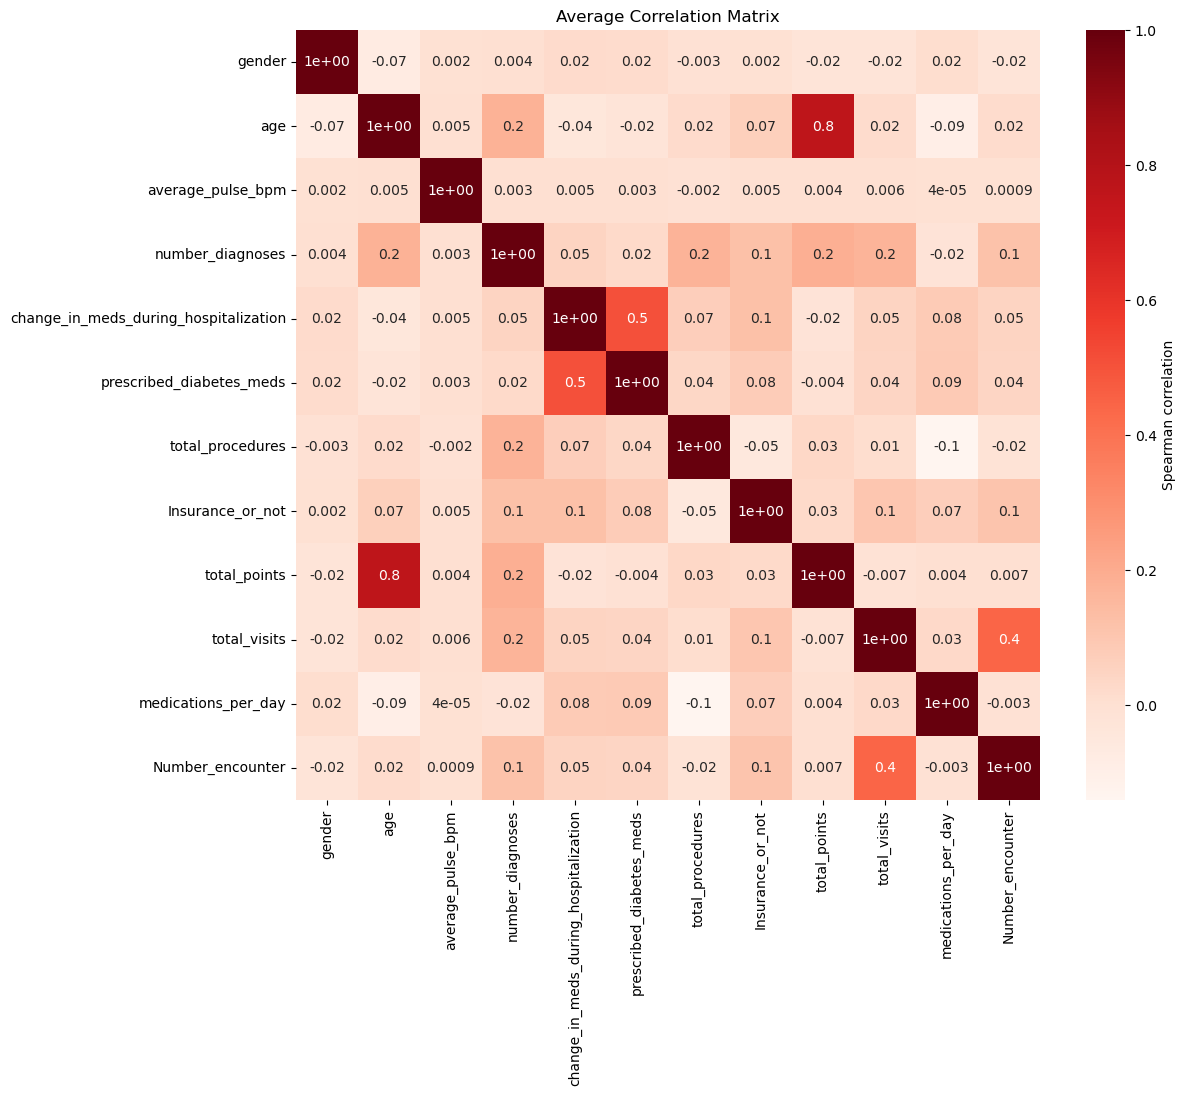

In [65]:
def cor_heatmap(cor, title="Correlation Matrix"):
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt='.1', cbar_kws={'label': 'Spearman correlation'})
    plt.title(title)
    plt.show()

cor_matrices_list = []
feature_names = X_train_num_scaled.columns 

for i, (train_index, val_index) in enumerate(skf.split(X_train_num_scaled, y_train_binary), 1):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]

    # Calculate correlation matrix for the training fold
    cor_matrix = X_train_fold.corr(method='spearman')

    # Append the correlation matrix to the list
    cor_matrices_list.append(cor_matrix)

# Calculate the average correlation matrix
avg_cor_matrix = np.mean(cor_matrices_list, axis=0)

# Convert the NumPy array to a DataFrame
avg_cor_matrix = pd.DataFrame(avg_cor_matrix, index=feature_names, columns=feature_names)

# Plot the average correlation matrix
cor_heatmap(avg_cor_matrix, title="Average Correlation Matrix")

### 3.4.2 Wrapper Methods

#### RFE with Logistic Regression

In [66]:
nof_list = np.arange(4,df_selection.shape[1])

# Variables to store the optimum features
nof = 0
high_score = 0

# Lists to store training and validation scores
train_score_list = []
val_score_list = []

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    # Lists to store scores for each fold
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
        X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
        y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

        X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)
        X_val_rfe = rfe.transform(X_val_fold)

        model.fit(X_train_rfe, y_train_fold)

        # Store results on training data
        fold_train_score = model.score(X_train_rfe, y_train_fold)
        fold_train_scores.append(fold_train_score)

        # Store results on validation data
        fold_val_score = model.score(X_val_rfe, y_val_fold)
        fold_val_scores.append(fold_val_score)

    # Calculate average scores for this number of features
    avg_train_score = np.mean(fold_train_scores)
    avg_val_score = np.mean(fold_val_scores)

    train_score_list.append(avg_train_score)
    val_score_list.append(avg_val_score)

    # Check for the best score
    if avg_val_score >= high_score:
        high_score = avg_val_score
        nof = nof_list[n]

# Fit the model with the optimum number of features
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=nof)
X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train_binary)
model.fit(X_train_rfe, y_train_binary)

# Storing selected features
selected_features_lg = pd.Series(rfe.support_, index=X_train_num_scaled.columns)

print("Optimum number of features:", nof)
print("Average Score with %d features:" % nof, high_score)
print(f"Features to select:\n{selected_features_lg}")

Optimum number of features: 4
Average Score with 4 features: 0.8869060209032135
Features to select:
gender                                   False
age                                       True
average_pulse_bpm                        False
number_diagnoses                         False
change_in_meds_during_hospitalization    False
prescribed_diabetes_meds                 False
total_procedures                         False
Insurance_or_not                         False
total_points                             False
total_visits                              True
medications_per_day                       True
Number_encounter                          True
dtype: bool


In [67]:
selected_features_lg = ['age', 'number_diagnoses', 'total_visits','Number_encounter' ]

#### RFE with Decisions Trees

In [68]:
nof_list = np.arange(4,df_selection.shape[1])

# Variables to store the optimum features
nof = 0
high_score = 0

# Lists to store training and validation scores
train_score_list = []
val_score_list = []

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    # Lists to store scores for each fold
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
        X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
        y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

        X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)
        X_val_rfe = rfe.transform(X_val_fold)

        model.fit(X_train_rfe, y_train_fold)

        # Store results on training data
        fold_train_score = model.score(X_train_rfe, y_train_fold)
        fold_train_scores.append(fold_train_score)

        # Store results on validation data
        fold_val_score = model.score(X_val_rfe, y_val_fold)
        fold_val_scores.append(fold_val_score)

    # Calculate average scores for this number of features
    avg_train_score = np.mean(fold_train_scores)
    avg_val_score = np.mean(fold_val_scores)

    train_score_list.append(avg_train_score)
    val_score_list.append(avg_val_score)

    # Check for the best score
    if avg_val_score >= high_score:
        high_score = avg_val_score
        nof = nof_list[n]

# Fit the model with the optimum number of features
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=nof)
X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train_binary)
model.fit(X_train_rfe, y_train_binary)

# Storing selected features
selected_features_dt = pd.Series(rfe.support_, index=X_train_num_scaled.columns)

print("Optimum number of features:", nof)
print("Average Score with %d features:" % nof, high_score)
print(f"Features to select:\n{selected_features_dt}")

Optimum number of features: 4
Average Score with 4 features: 0.8869060209032135
Features to select:
gender                                   False
age                                      False
average_pulse_bpm                         True
number_diagnoses                         False
change_in_meds_during_hospitalization    False
prescribed_diabetes_meds                 False
total_procedures                          True
Insurance_or_not                         False
total_points                              True
total_visits                             False
medications_per_day                       True
Number_encounter                         False
dtype: bool


In [69]:
selected_features_dt = ['age','total_procedures', 'total_points', 'medications_per_day' ]

### 3.4.3 Embebed Methods

#### Lasso

In [70]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

Total features: 12
Selected features across all folds: 9
Variables eliminated by Lasso: 0
Selected features: {'change_in_meds_during_hospitalization', 'total_visits', 'Number_encounter', 'Insurance_or_not', 'number_diagnoses', 'prescribed_diabetes_meds', 'age', 'medications_per_day', 'total_procedures'}


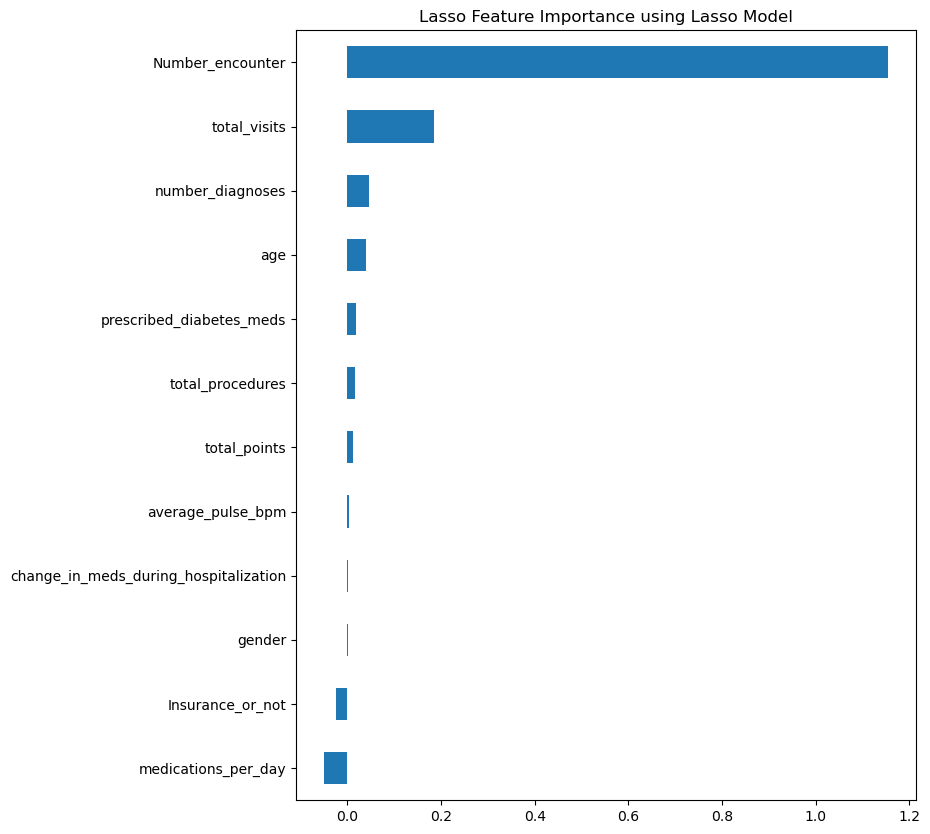

In [71]:
def plot_importance(coef, names, model_type, title="Feature Importance"):
    imp_coef = pd.Series(coef, index=names)
    imp_coef = imp_coef.sort_values()
    
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title(f"{title} using {model_type} Model")
    plt.show()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

reg = LassoCV()
# Lists to store selected features for each fold
selected_features_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    reg.fit(X_train_fold, y_train_fold)
    coef_fold = pd.Series(reg.coef_, index=X_train_fold.columns)
    selected_features_fold = coef_fold[coef_fold != 0].index
    selected_features_list.append(selected_features_fold)

# Combine selected features from all folds
selected_feat_lasso = set.intersection(*map(set, selected_features_list))

# Display results
print('Total features: {}'.format(X_train_num_scaled.shape[1]))
print('Selected features across all folds: {}'.format(len(selected_feat_lasso)))
print('Variables eliminated by Lasso: {}'.format(sum(reg.coef_ == 0)))
print('Selected features:', selected_feat_lasso)

# Plotting the feature importance
plot_importance(reg.coef_, X_train_num_scaled.columns, 'Lasso', title='Lasso Feature Importance')


In [72]:
selected_feat_lasso = ['age', 'number_diagnoses', 'Number_encounter', 'change_in_meds_during_hospitalization', 'medications_per_day', 'total_visits', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not']

#### Ridge

In [73]:

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))

selected_features_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    sel_.fit(X_train_fold, np.ravel(y_train_fold, order='C'))
    selected_features_fold = X_train_num_scaled.columns[(sel_.get_support())]
    selected_features_list.append(selected_features_fold)

# Combine selected features from all folds
selected_feat_ridge = set.intersection(*map(set, selected_features_list))

print('Total features: {}'.format(X_train_num_scaled.shape[1]))
print('Selected features across all folds: {}'.format(len(selected_feat_ridge)))
print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))
print('Selected features:', selected_feat_ridge)

Total features: 12
Selected features across all folds: 2
Features with coefficients shrank to zero: 0
Selected features: {'total_visits', 'Number_encounter'}


In [74]:
selected_feat_ridge = ['total_visits', 'Number_encounter']

#### Decision Tree

<Axes: xlabel='Value', ylabel='Col'>

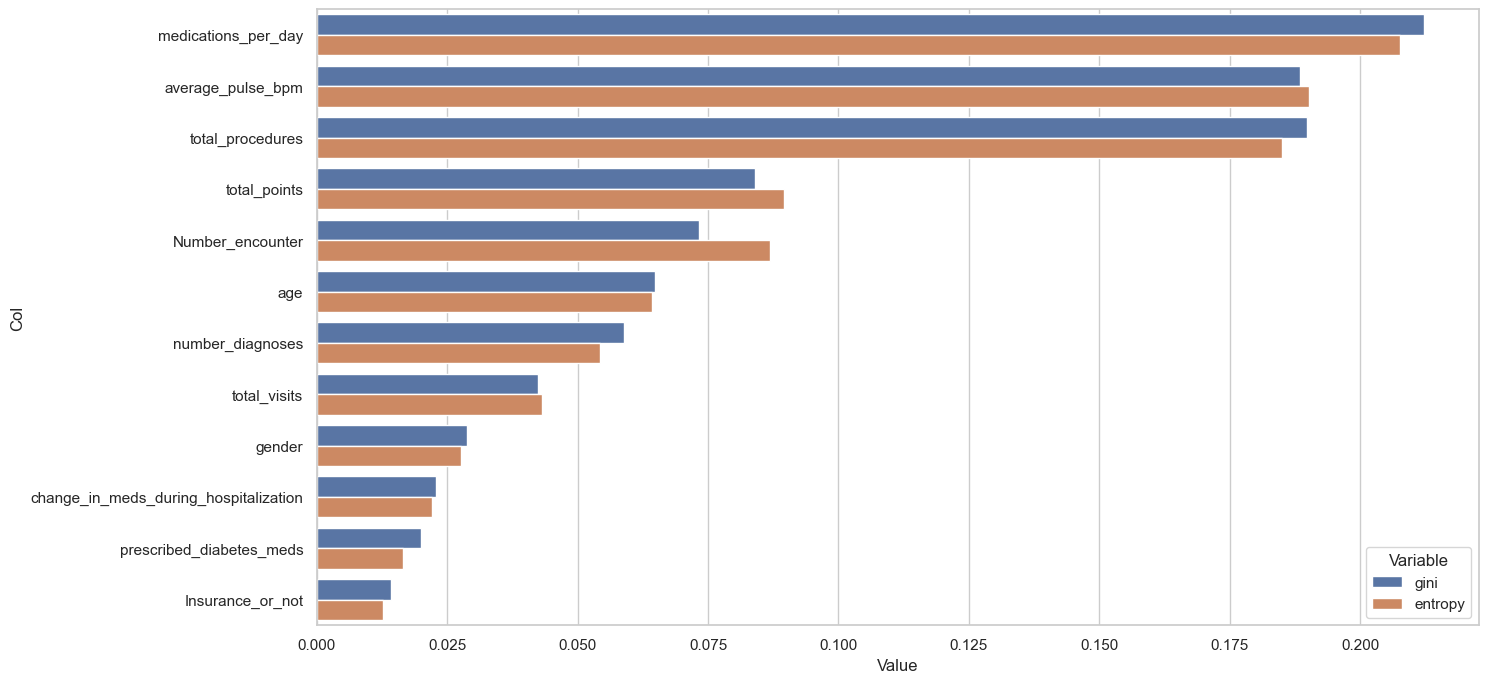

In [75]:
sns.set(style="whitegrid")

gini_importance = DecisionTreeClassifier().fit(X_train_num_scaled, y_train_binary).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_num_scaled, y_train_binary).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_num_scaled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### ANOVA

In [76]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
k_best = SelectKBest(score_func=f_classif)

# Lists to store selected features for each fold
selected_features_list = []

for train_index, val_index in skf.split(X_train_num_scaled, y_train_binary):
    X_train_fold, X_val_fold = X_train_num_scaled.iloc[train_index], X_train_num_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    # Set k to the desired number of features
    k_best.k = min(10, X_train_fold.shape[1])  # Adjust the value of k as needed

    # Fit and transform the training data
    X_train_fold_selected = k_best.fit_transform(X_train_fold, y_train_fold)

    # Get the selected features and store them
    selected_features_fold = X_train_fold.columns[k_best.get_support()]
    selected_features_list.append(selected_features_fold)

# Combine selected features from all folds
selected_feat_anova = set.intersection(*map(set, selected_features_list))

# Display results
print('Total features: {}'.format(X_train_num_scaled.shape[1]))
print('Selected features across all folds: {}'.format(len(selected_feat_anova)))
print('Selected features:', selected_feat_anova)

Total features: 12
Selected features across all folds: 10
Selected features: {'total_points', 'change_in_meds_during_hospitalization', 'total_visits', 'Number_encounter', 'number_diagnoses', 'Insurance_or_not', 'prescribed_diabetes_meds', 'age', 'medications_per_day', 'total_procedures'}


In [77]:
selected_feat_anova = ['age', 'number_diagnoses', 'Number_encounter', 'change_in_meds_during_hospitalization', 'total_points', 'medications_per_day', 'total_visits', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not']

## 3.5 Decisions

In [78]:
df_models = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
df_models_val =  pd.concat([X_val_num_scaled, X_val_cat], axis=1)
df_models_test =  pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [79]:
selected_features_data = []

rfe_lg = selected_features_lg
rfe_dt = selected_features_dt
lasso_features = selected_feat_lasso
ridge_features = selected_feat_ridge
anova_features = selected_feat_anova

dt_features = ['average_pulse_bpm', 'medications_per_day', 'Number_encounter', 'total_points', 'number_diagnoses', 'age', 'total_procedures']
corr_matrix = ['gender', 'age','average_pulse_bpm',  'number_diagnoses', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'total_procedures', 'Insurance_or_not','total_points','total_visits', 'medications_per_day', 'Number_encounter']

for feature in X_train_num_scaled.columns:
    rfe_logistic = 'Discard'
    rfe_decision_tree = 'Discard'
    lasso = 'Discard'  
    ridge = 'Discard'  
    dt = 'Discard'
    anova = 'Discard'

    if feature in rfe_lg:
        rfe_logistic = 'Keep'

    if feature in rfe_dt:
        rfe_decision_tree = 'Keep'

    if feature in lasso_features:
        lasso = 'Keep'

    if feature in ridge_features:
        ridge = 'Keep'
    
    if feature in dt_features:
        dt = 'Keep'

    if feature in anova_features:
        anova = 'Keep'
    
    discard_count = [rfe_logistic, rfe_decision_tree, lasso, ridge, dt, anova].count('Discard')
    decision = 'Discard' if discard_count > 3 else 'Keep'

    # Append the result to the selected_features_data list
    selected_features_data.append({'Feature': feature,'RFE Logistic':rfe_logistic ,'RFE DT' : rfe_decision_tree,'Lasso': lasso, 'Ridge': ridge, 'Decision Tree': dt, 'ANOVA': anova, 'Decision': decision})

# Create a DataFrame from the list of results
selected_features_df = pd.DataFrame(selected_features_data)

# Print the resulting DataFrame 
selected_features_df

,Feature,RFE Logistic,RFE DT,Lasso,Ridge,Decision Tree,ANOVA,Decision
0,gender,Discard,Discard,Discard,Discard,Discard,Discard,Discard
1,age,Keep,Keep,Keep,Discard,Keep,Keep,Keep
2,average_pulse_bpm,Discard,Discard,Discard,Discard,Keep,Discard,Discard
3,number_diagnoses,Keep,Discard,Keep,Discard,Keep,Keep,Keep
4,change_in_meds_during_hospitalization,Discard,Discard,Keep,Discard,Discard,Keep,Discard
5,prescribed_diabetes_meds,Discard,Discard,Keep,Discard,Discard,Keep,Discard
6,total_procedures,Discard,Keep,Keep,Discard,Keep,Keep,Keep
7,Insurance_or_not,Discard,Discard,Keep,Discard,Discard,Keep,Discard
8,total_points,Discard,Keep,Discard,Discard,Keep,Keep,Keep
9,total_visits,Keep,Discard,Keep,Keep,Discard,Keep,Keep


In [80]:
X_train_new = df_models.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not', 'admission_source', 'new_medications'], axis=1)
X_val_new = df_models_val.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not', 'admission_source', 'new_medications'], axis=1)
X_test = df_models_test.drop(['gender', 'average_pulse_bpm', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'Insurance_or_not', 'admission_source', 'new_medications'], axis=1)

In [81]:
X_train_new.shape

(56988, 11)

# 4. Modeling

## Binary Target

In [82]:
y_train_binary.value_counts(normalize=True)

readmitted_binary
0    0.887748
1    0.112252
Name: proportion, dtype: float64

## 4.1 Over Sampling

In [83]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_new, y_train_binary)
print(len(X_train_oversampled), len(y_train_oversampled))

101182 101182


### 4.1.1 Model Selection

In [84]:
 def evaluate_models(X_train, X_val, y_train, y_val, models):
     timer = []
     metrics = {
         'time': [],
         'train_f1': [],
         'val_f1': [],
         'precision': [],
         'recall': [],
     }

     for model_name, model in models.items():
         # Train the model
         begin = time.perf_counter()
         model.fit(X_train, y_train)
         end = time.perf_counter()

         # Make predictions on training and validation sets
         y_train_pred = model.predict(X_train)
         y_val_pred = model.predict(X_val)

         # Calculate precision, recall, and F1 scores
         train_f1 = f1_score(y_train, y_train_pred)
         val_f1 = f1_score(y_val, y_val_pred)
         precision = precision_score(y_val, y_val_pred)
         recall = recall_score(y_val, y_val_pred)

         metrics['time'].append(end - begin)
         metrics['train_f1'].append(train_f1)
         metrics['val_f1'].append(val_f1)
         metrics['precision'].append(precision)
         metrics['recall'].append(recall)

     avg_time = np.mean(metrics['time'])
     avg_train_f1 = np.mean(metrics['train_f1'])
     avg_val_f1 = np.mean(metrics['val_f1'])
     avg_precision = np.mean(metrics['precision'])
     avg_recall = np.mean(metrics['recall'])

     std_time = np.std(metrics['time'])
     std_train_f1 = np.std(metrics['train_f1'])
     std_val_f1 = np.std(metrics['val_f1'])
     std_precision = np.std(metrics['precision'])
     std_recall = np.std(metrics['recall'])

     return avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall

 def show_results(df, X_train, X_val, y_train, y_val, models):
     count = 0

     for model_name, model in models.items():
         avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall = evaluate_models(X_train, X_val, y_train, y_val, {model_name: model})

         # Ensure the DataFrame has enough rows
         if count >= len(df):
             df.loc[df.shape[0]] = [np.nan] * df.shape[1]

         # Calculate overfitting
         overfitting = avg_train_f1 - avg_val_f1

         # Assign values to the DataFrame
         df.iloc[count] = f"{avg_time:.3f}+/-{std_time:.2f}", f"{avg_train_f1:.3f}+/-{std_train_f1:.2f}", f"{avg_val_f1:.3f}+/-{std_val_f1:.2f}", f"{overfitting:.3f}", f"{avg_precision:.3f}+/-{std_precision:.2f}", f"{avg_recall:.3f}+/-{std_recall:.2f}"
         count += 1

     return df


 models_to_evaluate = {
     'LogisticRegression': LogisticRegression(),
     'KNeighborsClassifier': KNeighborsClassifier(),
     'DecisionTreeClassifier': DecisionTreeClassifier(),
     'MLPClassifier': MLPClassifier(),
     'GaussianNB': GaussianNB(),
 }

 df_all = pd.DataFrame(
     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
     index=list(models_to_evaluate.keys())
 )

 show_results(df_all, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, models_to_evaluate)


,Time,Train_F1,Validation_F1,Overfitting,Precision,Recall
LogisticRegression,0.629+/-0.00,0.600+/-0.00,0.226+/-0.00,0.374,0.186+/-0.00,0.288+/-0.00
KNeighborsClassifier,0.557+/-0.00,0.908+/-0.00,0.190+/-0.00,0.718,0.138+/-0.00,0.303+/-0.00
DecisionTreeClassifier,1.550+/-0.00,1.000+/-0.00,0.129+/-0.00,0.871,0.134+/-0.00,0.124+/-0.00
MLPClassifier,118.695+/-0.00,0.772+/-0.00,0.237+/-0.00,0.535,0.216+/-0.00,0.263+/-0.00
GaussianNB,0.050+/-0.00,0.550+/-0.00,0.231+/-0.00,0.319,0.173+/-0.00,0.346+/-0.00


### 4.1.2 Models Optimization

#### KNN

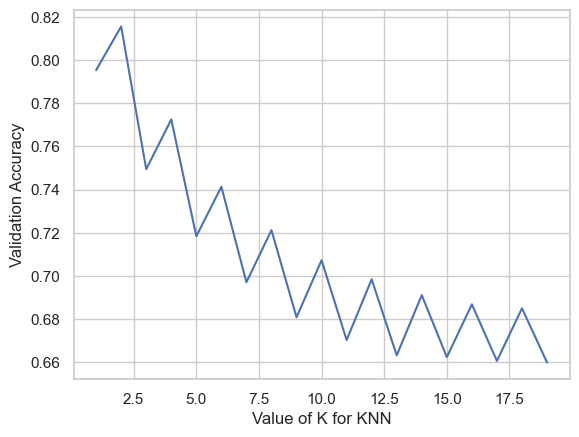

The best value for n_neighbor is 2 with accuracy 0.82


In [85]:
 sns.set(style="whitegrid")
 k_range = range(1, 20)

 scores = []

 for k in k_range:
     k = int(k)
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train_oversampled, y_train_oversampled)
     y_pred = knn.predict(X_val_new)
     scores.append(accuracy_score(y_val_binary, y_pred))

 plt.plot(k_range, scores)
 plt.xlabel('Value of K for KNN')
 plt.ylabel('Validation Accuracy')
 plt.show()

 best_index = np.argmax(scores)
 best_n_estimators = list(k_range)[best_index]
 print(f'The best value for n_neighbor is {best_n_estimators} with accuracy {scores[best_index]:.2f}')

In [86]:
 knn_model = KNeighborsClassifier()

 # Define the hyperparameter grid
 param_grid = {
     'n_neighbors': [2],
     'weights': ['uniform', 'distance'],
     'p': [1, 2],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
 }

 grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

 # Fit the grid search to the data
 grid_search.fit(X_train_oversampled, y_train_oversampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)

 # Use the best model to make predictions
 best_knn_model = grid_search.best_estimator_
 y_pred_knn = best_knn_model.predict(X_val_new)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [87]:
best_knn_oversample = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
best_knn_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_knn_oversample = best_knn_oversample.predict(X_train_oversampled)
y_pred_knn_oversample = best_knn_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_knn_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_knn_oversample))
print('kaggle result:0.1547 version59' )


F1 Score to the Train dataset: 0.9999209283017376
F1 Score to the Validation dataset: 0.1410043232457599
kaggle result:0.1547 version59


#### Logistic Regression

In [88]:
 lr_model = LogisticRegression(max_iter=1000)

 # Define the hyperparameter grid
 param_grid = {
     'solver' :['sag', 'saga'],
     'penalty': ['l1','l2'],
     "C":np.logspace(-3,3,7)
 }

 random_search = RandomizedSearchCV(lr_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

 # Fit the grid search to the data
 random_search.fit(X_train_oversampled, y_train_oversampled)

 # Get the best parameters from the grid search
 best_params = random_search.best_params_
 print("Best Parameters:", best_params)

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 100.0}


In [89]:
best_lg_oversample = LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
best_lg_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_lg_oversample = best_lg_oversample.predict(X_train_oversampled)
y_pred_lg_oversample = best_lg_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_lg_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_lg_oversample))
print('kaggle result: 0.266 version 60' )


F1 Score to the Train dataset: 0.6019383832367752
F1 Score to the Validation dataset: 0.23392380490172288
kaggle result: 0.266 version 60


#### Decision Trees

In [90]:
 sns.set(style="whitegrid")
 #AUC
 def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter, max_depth = None):
     train_results = []
     val_results = []
     for value in interval:
         if (parameter == 'max_depth'):          
             dt = DecisionTreeClassifier(max_depth = value, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'max_features'):  
             dt = DecisionTreeClassifier(max_features = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'min_samples_split'):  
             dt = DecisionTreeClassifier(min_samples_split = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'min_samples_leaf'):  
             dt = DecisionTreeClassifier(min_samples_leaf = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'criterion'):
             dt = DecisionTreeClassifier(criterion = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'splitter'):
             dt = DecisionTreeClassifier(splitter = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)

         train_pred = dt.predict(x_train)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous train results
         train_results.append(roc_auc)
         y_pred = dt.predict(x_val)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous validation results
         val_results.append(roc_auc)
     value_train = train_results.index(max(train_results))
     value_val = val_results.index(max(val_results))
     print('The best train value is ',interval[value_train])
     print('The best validation value is ',interval[value_val])
    


     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
     plt.ylabel("AUC score")
     plt.xlabel(str(parameter))
     plt.show()

The best train value is  15
The best validation value is  1


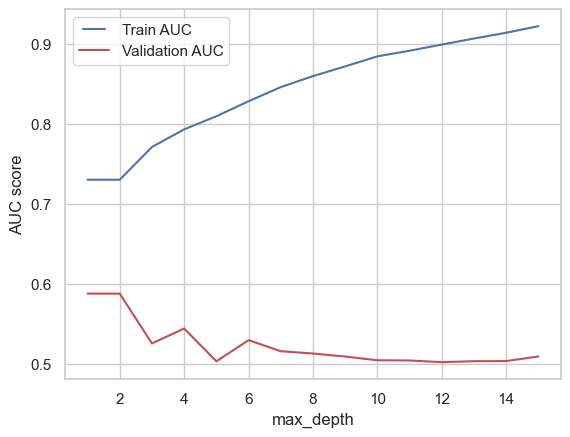

In [91]:
 max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
 calculate_AUC(max_depths, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'max_depth')


The best train value is  10
The best validation value is  1


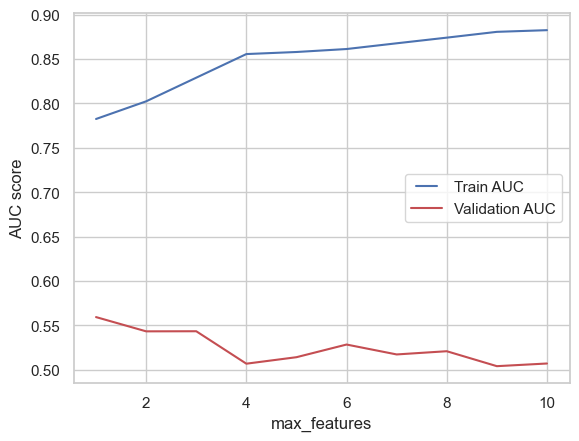

In [92]:
 max_features = list(range(1,len(X_train_oversampled.columns)))
 calculate_AUC(max_features, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary,'max_features', 10)

The best train value is  10
The best validation value is  179


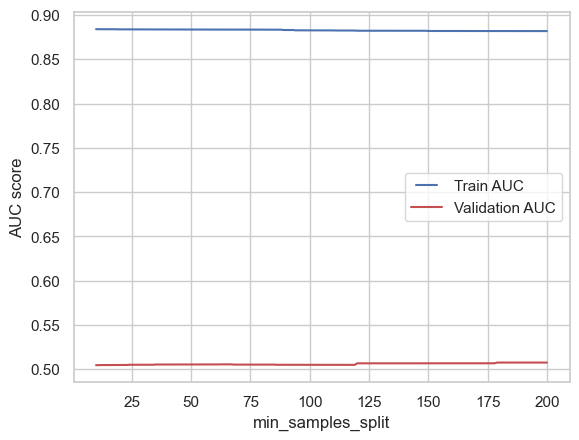

In [93]:
 min_samples_split = list(range(10,201))
 calculate_AUC(min_samples_split, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary,'min_samples_split', 10)

The best train value is  10
The best validation value is  118


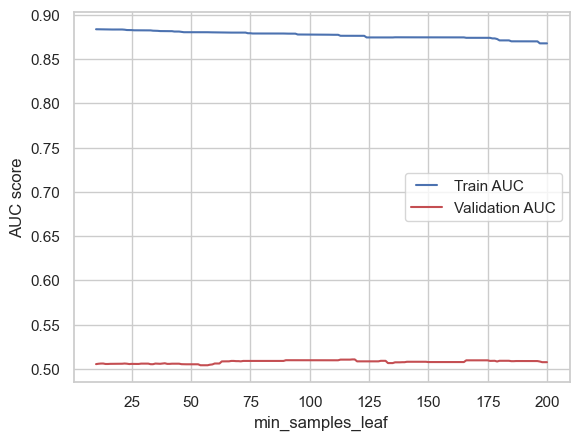

In [94]:
 min_samples_leaf = list(range(10,201))
 calculate_AUC(min_samples_leaf, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'min_samples_leaf', 10)

The best train value is  gini
The best validation value is  entropy


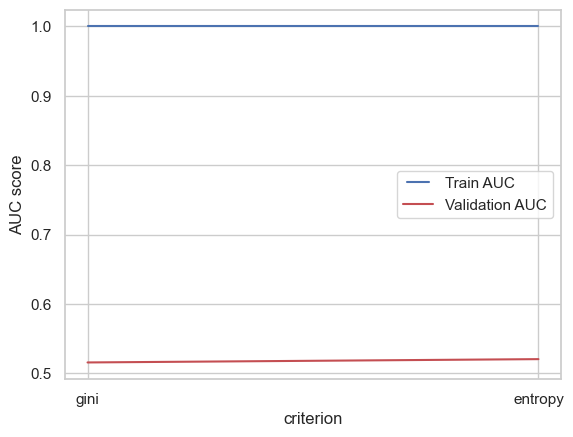

In [95]:
 criteria = ['gini', 'entropy']
 calculate_AUC(criteria, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'criterion')

The best train value is  best
The best validation value is  random


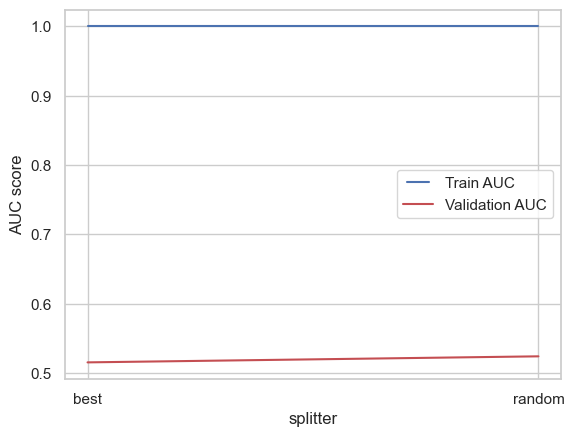

In [96]:
 splitter = ['best', 'random']
 calculate_AUC(splitter, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, 'splitter')

In [97]:
best_dt_oversample = DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42)
best_dt_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_dt_oversample = best_dt_oversample.predict(X_train_oversampled)
y_pred_dt_oversample = best_dt_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_dt_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_dt_oversample))
print('kaggle result: 0.3104 version 61' )


F1 Score to the Train dataset: 0.7401402487178755
F1 Score to the Validation dataset: 0.25962348974431015
kaggle result: 0.3104 version 61


#### Neural Networks

##### Random Search

In [98]:
 parameter_space_grid = {
     'hidden_layer_sizes': [4,6,(6,6),8,(50,),(50,50),(100,100)],
     'learning_rate_init': [0.001,0.0015, 0.01, 0.015, 0.1],
     'learning_rate': ['constant', 'adaptive'],
     'solver': [ 'adam', 'sgd'],
     'activation': ['relu', 'logistic', 'tanh'],
 }

 nn = MLPClassifier(max_iter = 100, random_state = 42)
 random_search = RandomizedSearchCV(nn, parameter_space_grid, cv=10, scoring='f1', n_jobs=-1)
 random_search.fit(X_train_oversampled, y_train_oversampled)

 best_params = random_search.best_params_
 print("Best Parameters:", best_params)

Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 6, 'activation': 'logistic'}


In [99]:
best_nn_oversample = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
best_nn_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_nn_oversample = best_nn_oversample.predict(X_train_oversampled)
y_pred_nn_oversample = best_nn_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_nn_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nn_oversample))
print('kaggle result:0.287 version 52' )


F1 Score to the Train dataset: 0.764457174031642
F1 Score to the Validation dataset: 0.2409997024695031
kaggle result:0.287 version 52


#### Naive Bayes

In [100]:
 nb = GaussianNB()
 param_grid = {
     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
 }

 grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1)
 grid_search.fit(X_train_oversampled, y_train_oversampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)

Best Parameters: {'var_smoothing': 1e-09}


In [101]:
best_nb_oversample =GaussianNB(var_smoothing = 1e-09)
best_nb_oversample.fit(X_train_oversampled, y_train_oversampled)

y_train_nb_oversample = best_nb_oversample.predict(X_train_oversampled)
y_pred_nb_oversample = best_nb_oversample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_oversampled, y_train_nb_oversample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nb_oversample))
print('kaggle result: 0.2505 version 63' )


F1 Score to the Train dataset: 0.5499977107275308
F1 Score to the Validation dataset: 0.23091808213287465
kaggle result: 0.2505 version 63


### Results with improved models 

In [102]:

 models_to_evaluate = {
     'LogisticRegression': LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0),
     'KNeighborsClassifier':  KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto'),
     'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42),
     'MLPClassifier': MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42),
     'GaussianNB': GaussianNB(var_smoothing = 1e-09),
 }

 df_all = pd.DataFrame(
     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
     index=list(models_to_evaluate.keys())
 )

 show_results(df_all, X_train_oversampled, X_val_new, y_train_oversampled, y_val_binary, models_to_evaluate)


,Time,Train_F1,Validation_F1,Overfitting,Precision,Recall
LogisticRegression,2.744+/-0.00,0.602+/-0.00,0.234+/-0.00,0.368,0.188+/-0.00,0.310+/-0.00
KNeighborsClassifier,0.286+/-0.00,1.000+/-0.00,0.141+/-0.00,0.859,0.146+/-0.00,0.137+/-0.00
DecisionTreeClassifier,0.116+/-0.00,0.740+/-0.00,0.260+/-0.00,0.481,0.230+/-0.00,0.297+/-0.00
MLPClassifier,40.868+/-0.00,0.764+/-0.00,0.241+/-0.00,0.523,0.224+/-0.00,0.261+/-0.00
GaussianNB,0.035+/-0.00,0.550+/-0.00,0.231+/-0.00,0.319,0.173+/-0.00,0.346+/-0.00


### ROC Curve

In [103]:
 final_model_lr_over = LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
 final_model_knn_over = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
 final_model_dt_over = DecisionTreeClassifier(max_depth=1, min_samples_leaf=188, min_samples_split=23, random_state=42)
 final_model_nn_over = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
 final_model_gb_over = GaussianNB(var_smoothing = 1e-09)

In [104]:
 model_lr = final_model_lr_over.fit(X_train_oversampled, y_train_oversampled)
 model_knn = final_model_knn_over.fit(X_train_oversampled, y_train_oversampled)
 model_dt = final_model_dt_over.fit(X_train_oversampled, y_train_oversampled)
 model_gb = final_model_gb_over.fit(X_train_oversampled, y_train_oversampled)
 model_nn = final_model_nn_over.fit(X_train_oversampled, y_train_oversampled)

In [105]:
 prob_modelLR = model_lr.predict_proba(X_val_new)
 prob_modelKNN = model_knn.predict_proba(X_val_new)
 prob_modelDT =  model_dt.predict_proba(X_val_new)
 prob_modelGB =  model_gb.predict_proba(X_val_new)
 prob_modelNN =  model_nn.predict_proba(X_val_new)

In [106]:
 fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val_binary, prob_modelLR[:,1])
 fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val_binary, y_score = prob_modelKNN[:,1])
 fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val_binary, prob_modelDT[:,1])
 fpr_modelGB, tpr_modelGB, thresholds_modelGB = roc_curve(y_val_binary, prob_modelGB[:,1])
 fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val_binary, prob_modelNN[:,1])

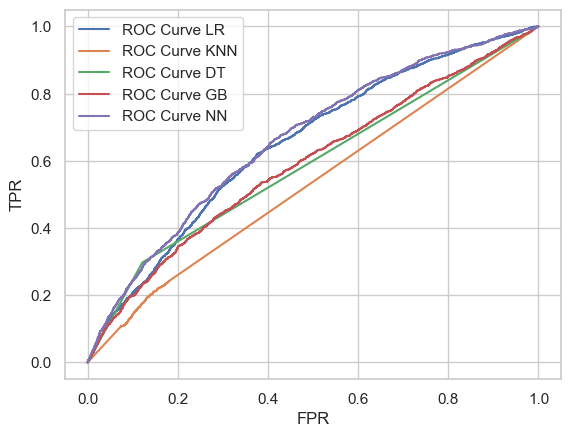

In [107]:
 plt.plot(fpr_modelLR, tpr_modelLR,label="ROC Curve LR")
 plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
 plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
 plt.plot(fpr_modelGB, tpr_modelGB, label="ROC Curve GB")
 plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
 plt.xlabel('FPR')
 plt.ylabel('TPR')
 plt.legend()
 plt.show()

## 4.2 Under Sampling

In [108]:
def undersample(X, y, ratio=1.0, random_state=None):
    sampler = RandomUnderSampler(sampling_strategy=ratio, random_state=random_state)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

X_train_undersampled, y_train_undersampled = undersample(X_train_new, y_train_binary)
len(X_train_undersampled), len(y_train_undersampled)

(12794, 12794)

### 4.2.1 Model Selection

In [109]:
 def evaluate_models(X_train, X_val, y_train, y_val, models):
     timer = []
     metrics = {
         'time': [],
         'train_f1': [],
         'val_f1': [],
         'precision': [],
         'recall': [],
     }

     for model_name, model in models.items():
         # Train the model
         begin = time.perf_counter()
         model.fit(X_train, y_train)
         end = time.perf_counter()

         # Make predictions on training and validation sets
         y_train_pred = model.predict(X_train)
         y_val_pred = model.predict(X_val)

         # Calculate precision, recall, and F1 scores
         train_f1 = f1_score(y_train, y_train_pred)
         val_f1 = f1_score(y_val, y_val_pred)
         precision = precision_score(y_val, y_val_pred)
         recall = recall_score(y_val, y_val_pred)

         metrics['time'].append(end - begin)
         metrics['train_f1'].append(train_f1)
         metrics['val_f1'].append(val_f1)
         metrics['precision'].append(precision)
         metrics['recall'].append(recall)

     avg_time = np.mean(metrics['time'])
     avg_train_f1 = np.mean(metrics['train_f1'])
     avg_val_f1 = np.mean(metrics['val_f1'])
     avg_precision = np.mean(metrics['precision'])
     avg_recall = np.mean(metrics['recall'])

     std_time = np.std(metrics['time'])
     std_train_f1 = np.std(metrics['train_f1'])
     std_val_f1 = np.std(metrics['val_f1'])
     std_precision = np.std(metrics['precision'])
     std_recall = np.std(metrics['recall'])

     return avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall

 def show_results(df, X_train, X_val, y_train, y_val, models):
     count = 0

     for model_name, model in models.items():
         avg_time, avg_train_f1, avg_val_f1, avg_precision, avg_recall, std_time, std_train_f1, std_val_f1, std_precision, std_recall = evaluate_models(X_train, X_val, y_train, y_val, {model_name: model})

         # Ensure the DataFrame has enough rows
         if count >= len(df):
             df.loc[df.shape[0]] = [np.nan] * df.shape[1]

         # Calculate overfitting
         overfitting = avg_train_f1 - avg_val_f1

         # Assign values to the DataFrame
         df.iloc[count] = f"{avg_time:.3f}+/-{std_time:.2f}", f"{avg_train_f1:.3f}+/-{std_train_f1:.2f}", f"{avg_val_f1:.3f}+/-{std_val_f1:.2f}", f"{overfitting:.3f}", f"{avg_precision:.3f}+/-{std_precision:.2f}", f"{avg_recall:.3f}+/-{std_recall:.2f}"
         count += 1

     return df


 models_to_evaluate = {
     'LogisticRegression': LogisticRegression(),
     'KNeighborsClassifier': KNeighborsClassifier(),
     'DecisionTreeClassifier': DecisionTreeClassifier(),
     'MLPClassifier': MLPClassifier(),
     'GaussianNB': GaussianNB(),
 }

 df_all = pd.DataFrame(
     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
     index=list(models_to_evaluate.keys())
 )

 show_results(df_all, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, models_to_evaluate)


,Time,Train_F1,Validation_F1,Overfitting,Precision,Recall
LogisticRegression,0.030+/-0.00,0.600+/-0.00,0.237+/-0.00,0.364,0.193+/-0.00,0.305+/-0.00
KNeighborsClassifier,0.028+/-0.00,0.715+/-0.00,0.203+/-0.00,0.512,0.133+/-0.00,0.428+/-0.00
DecisionTreeClassifier,0.078+/-0.00,1.000+/-0.00,0.213+/-0.00,0.787,0.136+/-0.00,0.485+/-0.00
MLPClassifier,4.441+/-0.00,0.681+/-0.00,0.268+/-0.00,0.412,0.196+/-0.00,0.426+/-0.00
GaussianNB,0.005+/-0.00,0.492+/-0.00,0.216+/-0.00,0.277,0.180+/-0.00,0.269+/-0.00


### 4.2.2 Models Optimization

#### KNN

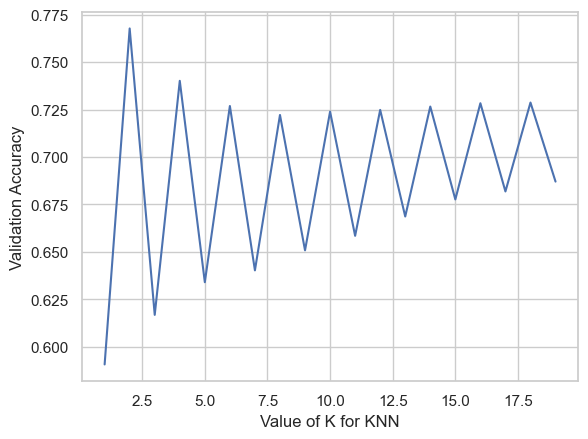

The best value for n_neighbors is 2 with accuracy 0.77


In [110]:
 sns.set(style="whitegrid")
 k_range = range(1, 20)

 scores = []

 for k in k_range:
     k = int(k)
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train_undersampled, y_train_undersampled)
     y_pred = knn.predict(X_val_new)
     scores.append(accuracy_score(y_val_binary, y_pred))

 plt.plot(k_range, scores)
 plt.xlabel('Value of K for KNN')
 plt.ylabel('Validation Accuracy')
 plt.show()

 best_index = np.argmax(scores)
 best_n_estimators = list(k_range)[best_index]
 print(f'The best value for n_neighbors is {best_n_estimators} with accuracy {scores[best_index]:.2f}')

In [111]:
 knn_model = KNeighborsClassifier()

 # Define the hyperparameter grid
 param_grid = {
     'n_neighbors': [2],
     'weights': ['uniform', 'distance'],
     'p': [1, 2],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
 }

 grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

 # Fit the grid search to the data
 grid_search.fit(X_train_undersampled, y_train_undersampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)

 # Use the best model to make predictions
 best_knn_model = grid_search.best_estimator_
 y_pred_knn = best_knn_model.predict(X_val_new)


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [112]:
best_knn_undersample = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2 , algorithm='auto')
best_knn_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_knn_undersample = best_knn_undersample.predict(X_train_undersampled)
y_pred_knn_undersample = best_knn_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_knn_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_knn_undersample))
print('kaggle result:0.2049 version 38' )


F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.19782638602283675
kaggle result:0.2049 version 38


#### Logistic Regression

In [113]:
 lr_model = LogisticRegression(max_iter=1000)

 # Define the hyperparameter grid
 param_grid = {
     'solver' :['sag', 'saga'],
     'penalty': ['l1','l2'],
     "C":np.logspace(-3,3,7)
 }

 grid_search = GridSearchCV(lr_model, param_grid, cv=10, scoring='f1', n_jobs=-1)

 # Fit the grid search to the data
 grid_search.fit(X_train_undersampled, y_train_undersampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)


Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [114]:
best_lg_undersample =LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01)
best_lg_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_lg_undersample = best_lg_undersample.predict(X_train_undersampled)
y_pred_lg_undersample = best_lg_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_lg_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_lg_undersample))
print('kaggle result: 0.2439 version 39' )


F1 Score to the Train dataset: 0.6000616712920136
F1 Score to the Validation dataset: 0.22283432034155076
kaggle result: 0.2439 version 39


#### Decision Trees

In [115]:
 sns.set(style="whitegrid")
 #AUC
 def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter, max_depth = None):
     train_results = []
     val_results = []
     for value in interval:
         if (parameter == 'max_depth'):          
             dt = DecisionTreeClassifier(max_depth = value, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'max_features'):  
             dt = DecisionTreeClassifier(max_features = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'min_samples_split'):  
             dt = DecisionTreeClassifier(min_samples_split = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'min_samples_leaf'):  
             dt = DecisionTreeClassifier(min_samples_leaf = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'criterion'):
             dt = DecisionTreeClassifier(criterion = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)
         elif (parameter == 'splitter'):
             dt = DecisionTreeClassifier(splitter = value, max_depth = max_depth, random_state=42)
             dt.fit(x_train, y_train)

         train_pred = dt.predict(x_train)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous train results
         train_results.append(roc_auc)
         y_pred = dt.predict(x_val)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous validation results
         val_results.append(roc_auc)
     value_train = train_results.index(max(train_results))
     value_val = val_results.index(max(val_results))
     print('The best train value is ',interval[value_train])
     print('The best validation value is ',interval[value_val])
    

     import matplotlib.pyplot as plt
     from matplotlib.legend_handler import HandlerLine2D
     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
     plt.ylabel("AUC score")
     plt.xlabel(str(parameter))
     plt.show()

The best train value is  15
The best validation value is  5


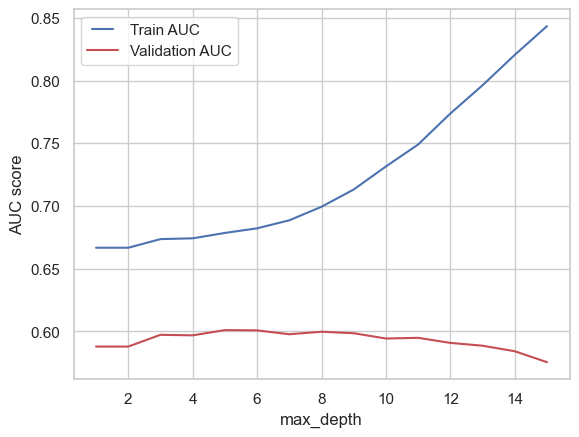

In [116]:
 max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
 calculate_AUC(max_depths, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'max_depth')


The best train value is  10
The best validation value is  8


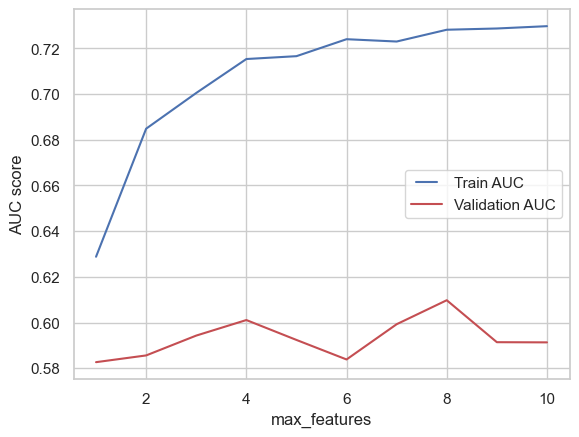

In [117]:
 max_features = list(range(1,len(X_train_oversampled.columns)))
 calculate_AUC(max_features,X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary,'max_features', 10)

The best train value is  10
The best validation value is  183


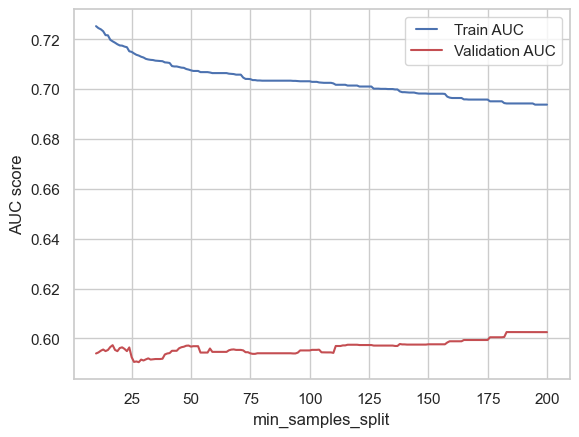

In [118]:
 min_samples_split = list(range(10,201))
 calculate_AUC(min_samples_split, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary,'min_samples_split', 10)

The best train value is  10
The best validation value is  98


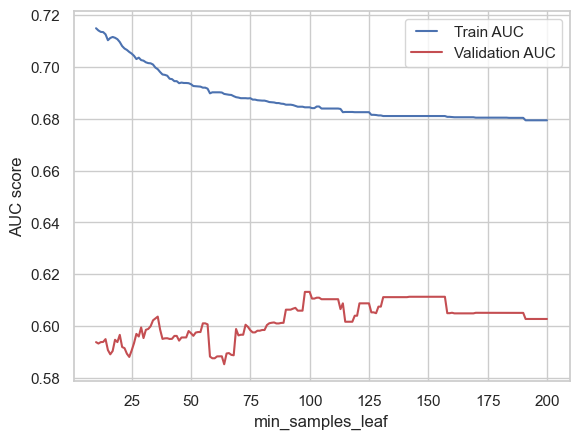

In [119]:
 min_samples_leaf = list(range(10,201))
 calculate_AUC(min_samples_leaf,X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'min_samples_leaf', 10)

The best train value is  gini
The best validation value is  entropy


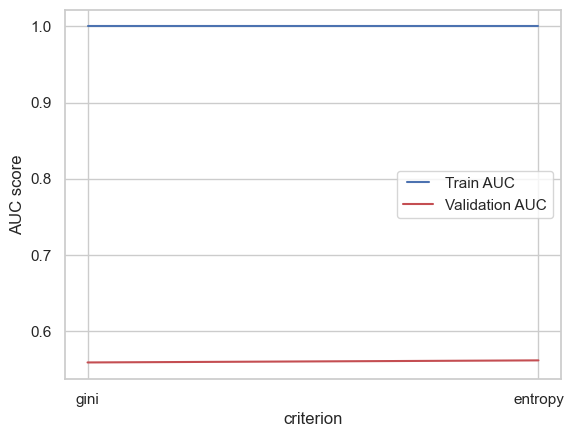

In [120]:
 criteria = ['gini', 'entropy']
 calculate_AUC(criteria, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'criterion')

The best train value is  best
The best validation value is  best


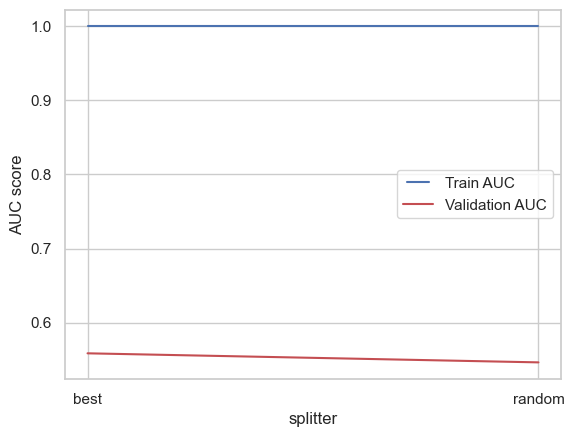

In [121]:
 splitter = ['best', 'random']
 calculate_AUC(splitter, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'splitter')

In [122]:
best_dt_undersample = DecisionTreeClassifier(max_depth=5, min_samples_leaf=82, min_samples_split=178, random_state=42)
best_dt_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_dt_undersample = best_dt_undersample.predict(X_train_undersampled)
y_pred_dt_undersample = best_dt_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_dt_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_dt_undersample))
print('kaggle result: 0.2875 version 64' )


F1 Score to the Train dataset: 0.671290759786335
F1 Score to the Validation dataset: 0.26746506986027946
kaggle result: 0.2875 version 64


#### Neural Networks

In [123]:
 sns.set(style="whitegrid")
 #AUC
 def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter):
     train_results = []
     val_results = []
     for value in interval:
         if (parameter == 'solver'):          
             nn = MLPClassifier( solver = value, random_state=42)
             nn.fit(x_train, y_train)
         elif (parameter == 'learning_rate'): 
             nn =MLPClassifier( learning_rate= value, random_state=42)
             nn.fit(x_train, y_train)
         elif (parameter == 'activation'):
             nn = MLPClassifier(activation = value, random_state=42)
             nn.fit(x_train, y_train)
         elif (parameter == 'learning_rate_init'):
             nn = MLPClassifier(learning_rate_init=  value, random_state=42)
             nn.fit(x_train, y_train)
         elif (parameter == 'max_iter'):
             nn = MLPClassifier(max_iter=  value, random_state=42)
             nn.fit(x_train, y_train)


         train_pred = nn.predict(x_train)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous train results
         train_results.append(roc_auc)
         y_pred = nn.predict(x_val)
         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
         roc_auc = auc(false_positive_rate, true_positive_rate)
         # Add auc score to previous validation results
         val_results.append(roc_auc)
     value_train = train_results.index(max(train_results))
     value_val = val_results.index(max(val_results))
     print('The best train value is ',interval[value_train])
     print('The best validation value is ',interval[value_val])
    

     import matplotlib.pyplot as plt
     from matplotlib.legend_handler import HandlerLine2D
     line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
     line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
     plt.ylabel("AUC score")
     plt.xlabel(str(parameter))
     plt.show()

The best train value is  0.023000000000000003
The best validation value is  0.034


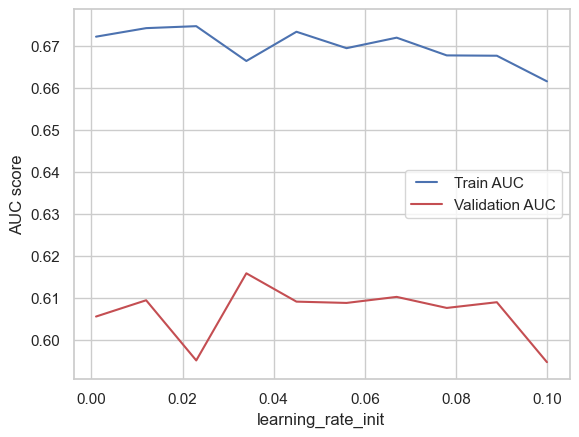

In [124]:
 learning_rate_init = np.linspace(0.001, 0.1, num=10)
 calculate_AUC(learning_rate_init, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'learning_rate_init')

The best train value is  lbfgs
The best validation value is  lbfgs


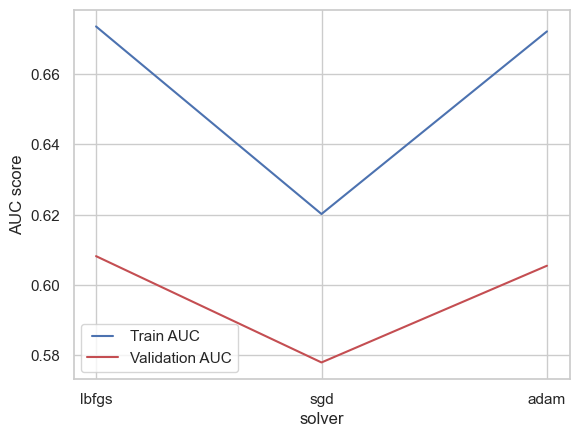

In [125]:
 solver = ['lbfgs', 'sgd', 'adam']
 calculate_AUC(solver, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'solver')

The best train value is  relu
The best validation value is  relu


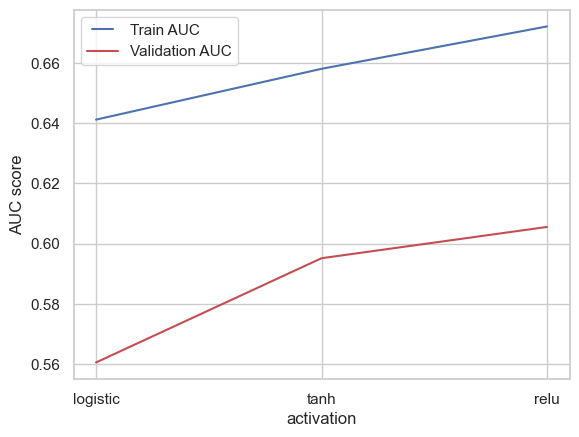

In [126]:
 activation = ['logistic', 'tanh', 'relu']
 calculate_AUC(activation, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'activation')

The best train value is  constant
The best validation value is  constant


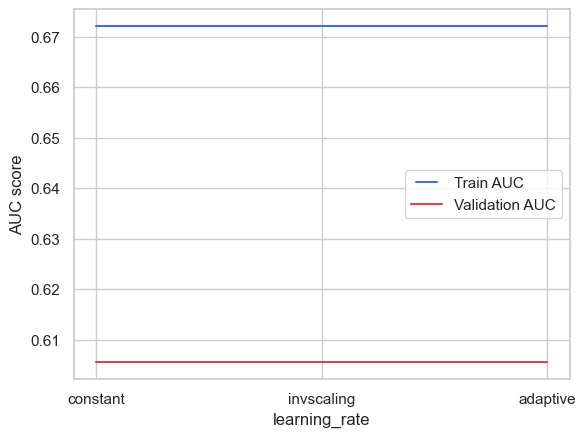

In [127]:
 learning_rate = ['constant', 'invscaling', 'adaptive']
 calculate_AUC(learning_rate, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'learning_rate')

The best train value is  100
The best validation value is  100


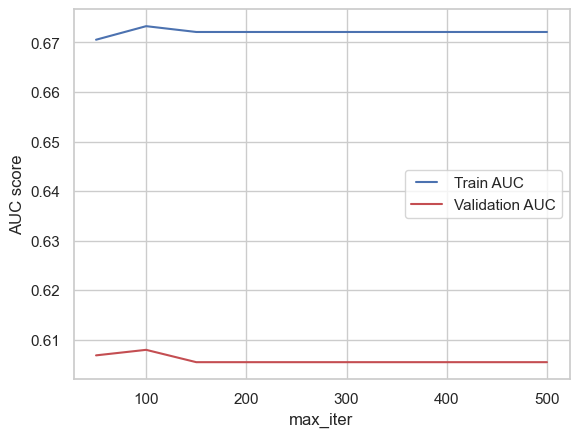

In [128]:
 max_iter_values = np.arange(50, 501, 50) 
 calculate_AUC(max_iter_values, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, 'max_iter')

##### Grid Search

In [129]:
 parameter_space_grid = {
     'hidden_layer_sizes': [4,6,(6,6),8, (100,100)],
     'learning_rate_init': [0.034],
     'learning_rate': ['constant'],
     'solver': [ 'lbfgs'],
     'activation': ['relu']
 }
 nn = MLPClassifier(max_iter = 100, random_state = 42)
 grid_search = GridSearchCV(nn, parameter_space_grid, cv=10, scoring='f1', n_jobs=-1)
 grid_search.fit(X_train_undersampled, y_train_undersampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': 8, 'learning_rate': 'constant', 'learning_rate_init': 0.034, 'solver': 'lbfgs'}


In [130]:
best_nn_undersample = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
best_nn_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_nn_undersample = best_nn_undersample.predict(X_train_undersampled)
y_pred_nn_undersample = best_nn_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_nn_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_nn_undersample))
print('kaggle result:0.2841 version41' )


F1 Score to the Train dataset: 0.6827544730115772
F1 Score to the Validation dataset: 0.26664159458443026
kaggle result:0.2841 version41


#### Naive Bayes

In [131]:
 nb = GaussianNB()
 param_grid = {
     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
 }

 grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1)
 grid_search.fit(X_train_undersampled, y_train_undersampled)

 # Get the best parameters from the grid search
 best_params = grid_search.best_params_
 print("Best Parameters:", best_params)

Best Parameters: {'var_smoothing': 1e-09}


In [132]:
best_gb_undersample =GaussianNB(var_smoothing = 1e-09)
best_gb_undersample.fit(X_train_undersampled, y_train_undersampled)

y_train_gb_undersample = best_gb_undersample.predict(X_train_undersampled)
y_pred_gb_undersample = best_gb_undersample.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_gb_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_gb_undersample))
print('kaggle result:0.2294 version42' )


F1 Score to the Train dataset: 0.4924363057324839
F1 Score to the Validation dataset: 0.21568627450980393
kaggle result:0.2294 version42


### Results with improved models

In [133]:
 models_to_evaluate = {
     'LogisticRegression': LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01),
     'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto'),
     'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, min_samples_leaf=82, min_samples_split=178, random_state=42),
     'MLPClassifier': MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 ),
     'GaussianNB': GaussianNB(var_smoothing = 1e-09),
 }

 df_all = pd.DataFrame(
     columns=['Time', 'Train_F1', 'Validation_F1', 'Overfitting', 'Precision', 'Recall'],
     index=list(models_to_evaluate.keys())
 )

 show_results(df_all, X_train_undersampled, X_val_new, y_train_undersampled, y_val_binary, models_to_evaluate)


,Time,Train_F1,Validation_F1,Overfitting,Precision,Recall
LogisticRegression,0.036+/-0.00,0.600+/-0.00,0.223+/-0.00,0.377,0.142+/-0.00,0.522+/-0.00
KNeighborsClassifier,0.027+/-0.00,1.000+/-0.00,0.201+/-0.00,0.799,0.129+/-0.00,0.456+/-0.00
DecisionTreeClassifier,0.017+/-0.00,0.671+/-0.00,0.267+/-0.00,0.404,0.204+/-0.00,0.388+/-0.00
MLPClassifier,0.340+/-0.00,0.683+/-0.00,0.267+/-0.00,0.416,0.188+/-0.00,0.457+/-0.00
GaussianNB,0.005+/-0.00,0.492+/-0.00,0.216+/-0.00,0.277,0.180+/-0.00,0.269+/-0.00


### ROC Curve

In [134]:
 final_model_lr_under = LogisticRegression(solver = 'sag', penalty = 'l2', C=0.01)
 final_model_knn_under = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1, algorithm='auto')
 final_model_dt_under = DecisionTreeClassifier(max_depth=5, min_samples_leaf=91, min_samples_split=181, random_state=42)
 final_model_nn_under = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
 final_model_gb_under = GaussianNB(var_smoothing = 1e-09)


In [135]:
 model_lr = final_model_lr_under.fit(X_train_undersampled, y_train_undersampled)
 model_knn = final_model_knn_under.fit(X_train_undersampled, y_train_undersampled)
 model_dt = final_model_dt_under.fit(X_train_undersampled, y_train_undersampled)
 model_gb = final_model_gb_under.fit(X_train_undersampled, y_train_undersampled)
 model_nn = final_model_nn_under.fit(X_train_undersampled, y_train_undersampled)

In [136]:
 prob_modelLR = model_lr.predict_proba(X_val_new)
 prob_modelKNN = model_knn.predict_proba(X_val_new)
 prob_modelDT =  model_dt.predict_proba(X_val_new)
 prob_modelGB =  model_gb.predict_proba(X_val_new)
 prob_modelNN =  model_nn.predict_proba(X_val_new)

In [137]:
 fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val_binary, prob_modelLR[:,1])
 fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val_binary, y_score = prob_modelKNN[:,1])
 fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val_binary, prob_modelDT[:,1])
 fpr_modelGB, tpr_modelGB, thresholds_modelGB = roc_curve(y_val_binary, prob_modelGB[:,1])
 fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val_binary, prob_modelNN[:,1])

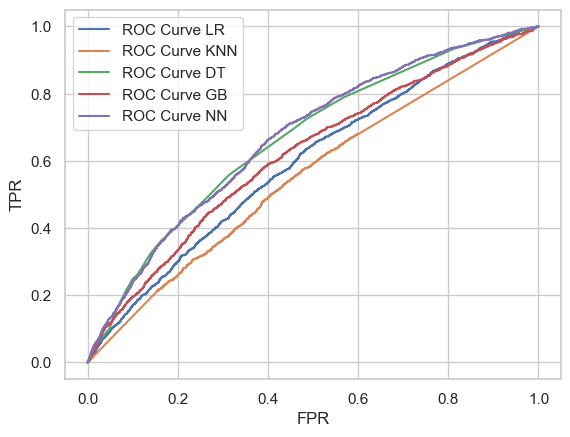

In [138]:
 plt.plot(fpr_modelLR, tpr_modelLR,label="ROC Curve LR")
 plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
 plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
 plt.plot(fpr_modelGB, tpr_modelGB, label="ROC Curve GB")
 plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
 plt.xlabel('FPR')
 plt.ylabel('TPR')
 plt.legend()
 plt.show()

## 4.3 Ensemble Methods - UnderSample 

### Bagging

In [140]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

In [141]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [142]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train_undersampled, y_train_undersampled)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>DecisionTreeClassifier() 0.572 (0.013)
>DecisionTreeClassifier()_bagging 0.599 (0.014)
>KNeighborsClassifier() 0.565 (0.017)
>KNeighborsClassifier()_bagging 0.563 (0.021)


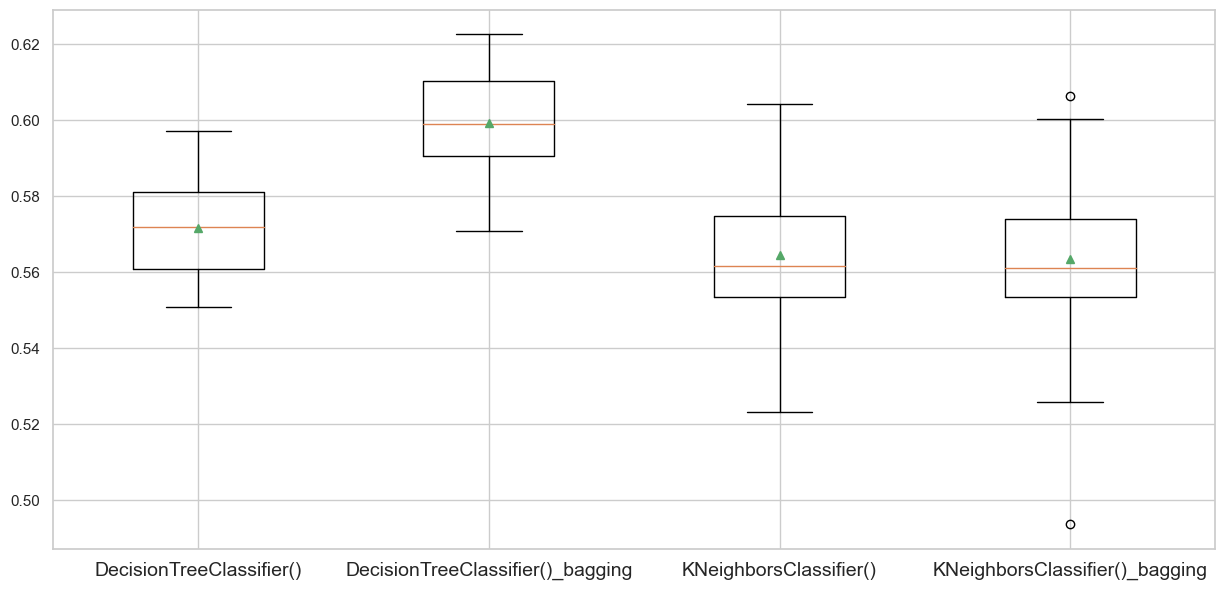

In [143]:
 dt = DecisionTreeClassifier()
 knn = KNeighborsClassifier()

 def get_models(*args):
     models = dict()
     for arg in args:
         models[str(arg)] = arg
         models[str(arg) + '_bagging'] = BaggingClassifier(estimator = arg, random_state = 42)      
     return models

 models = get_models(dt, knn)
 return_results(models)

>2 0.467 (0.018)
>5 0.609 (0.013)
>10 0.599 (0.014)
>20 0.625 (0.013)
>30 0.634 (0.012)
>50 0.641 (0.011)
>100 0.648 (0.012)


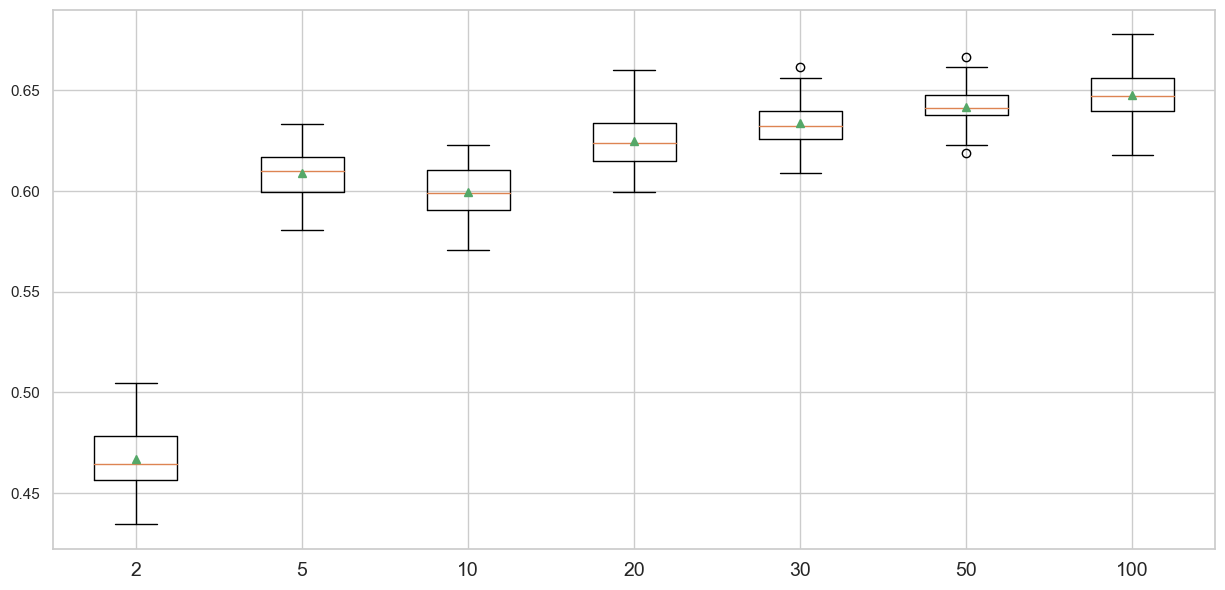

In [144]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = BaggingClassifier(n_estimators = value, random_state = 42)      
     return models

 models = get_models([2,5,10,20,30,50,100])
 return_results(models)

>0.1 0.605 (0.016)
>0.2 0.604 (0.015)
>0.4 0.602 (0.015)
>0.6 0.599 (0.015)
>0.8 0.602 (0.013)
>1.0 0.599 (0.014)


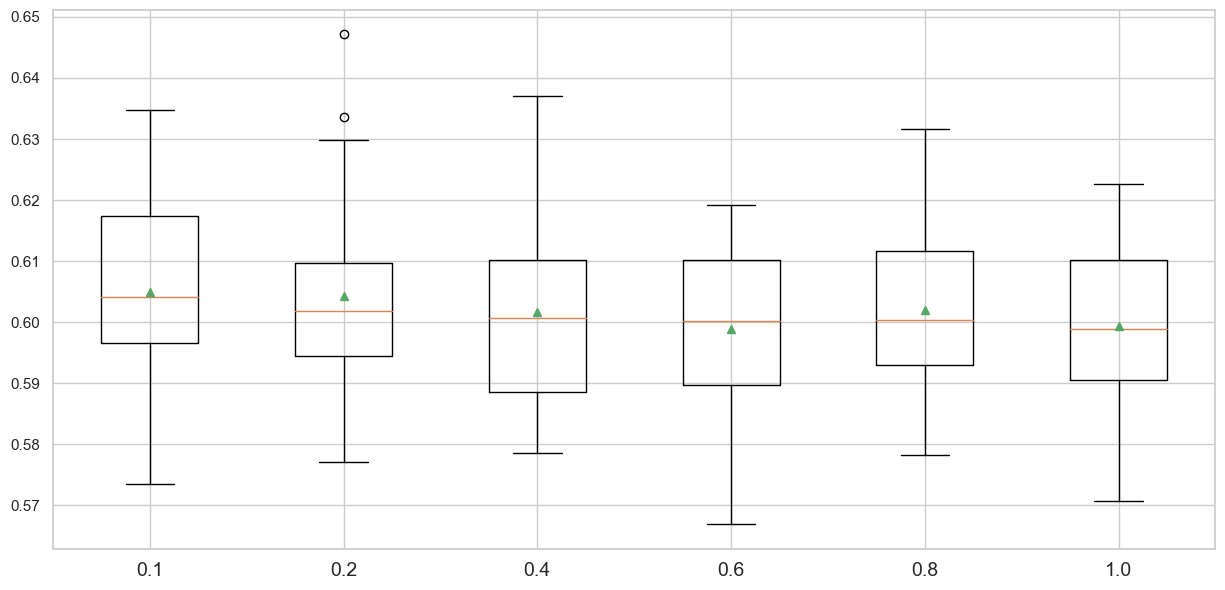

In [145]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = BaggingClassifier(max_samples = value, random_state = 42)      
     return models

 models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
 return_results(models)

>True 0.599 (0.014)
>False 0.564 (0.013)


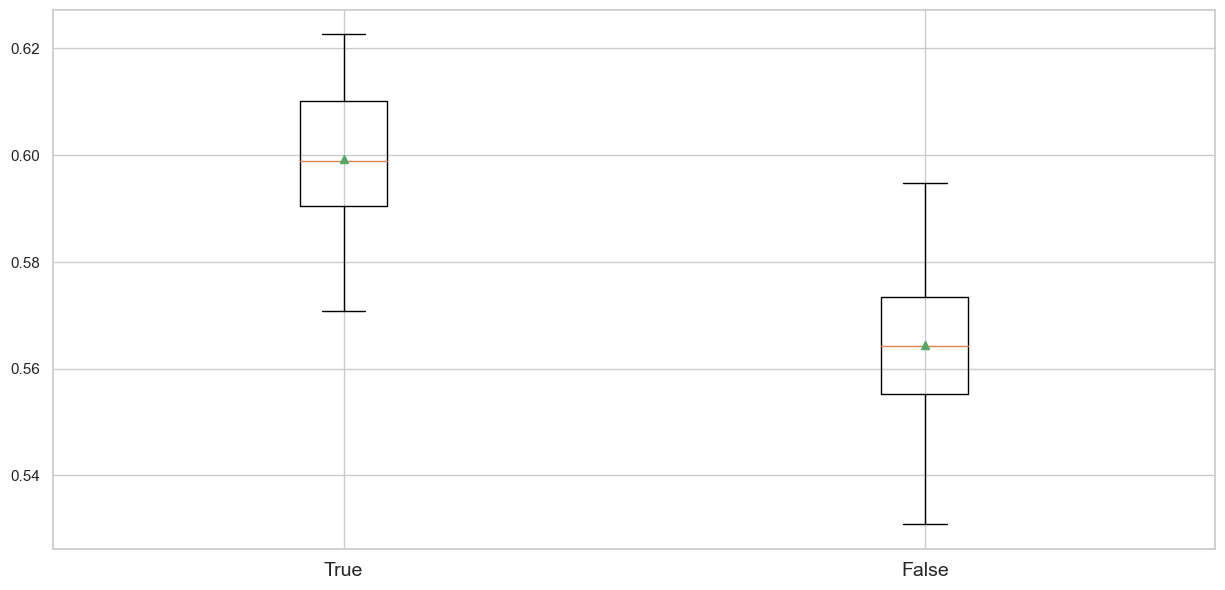

In [146]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 42)      
     return models

 models = get_models([True, False])
 return_results(models)

>True 0.608 (0.012)
>False 0.599 (0.014)


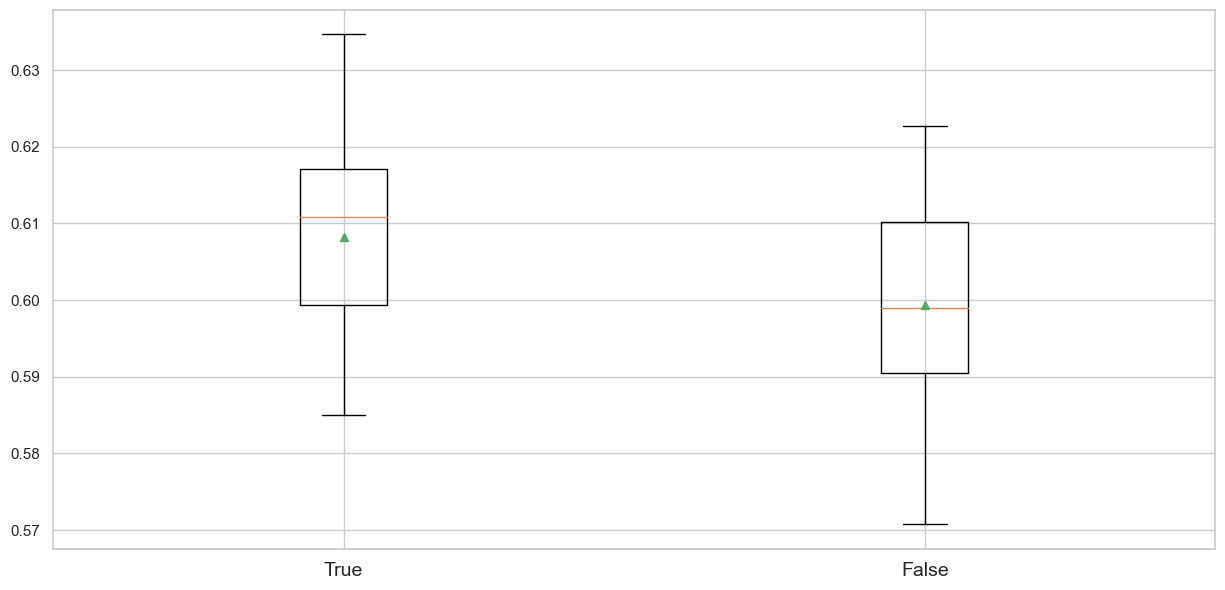

In [147]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = BaggingClassifier(bootstrap_features = value, random_state = 42)      
     return models

 models = get_models([True, False])
 return_results(models)

In [148]:
estimator_bagging = DecisionTreeClassifier()
bagging_under = BaggingClassifier(estimator = estimator_bagging, n_estimators=100 , max_samples= 0.2, bootstrap = True, bootstrap_features = True, random_state = 42)

bagging_under.fit(X_train_undersampled, y_train_undersampled)

y_train_bagging_undersample = bagging_under.predict(X_train_undersampled)
y_pred_bagging_undersample = bagging_under.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_bagging_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_bagging_undersample))
print('kaggle result:0.2959 version53' )


F1 Score to the Train dataset: 0.8363296754611254
F1 Score to the Validation dataset: 0.25612865267699547
kaggle result:0.2959 version53


### Random Forest

In [326]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 42)      
     return models

 models = get_models([10,20,50,100,200,300])
 return_results(models)

>True 0.660 (0.009)
>False 0.649 (0.011)


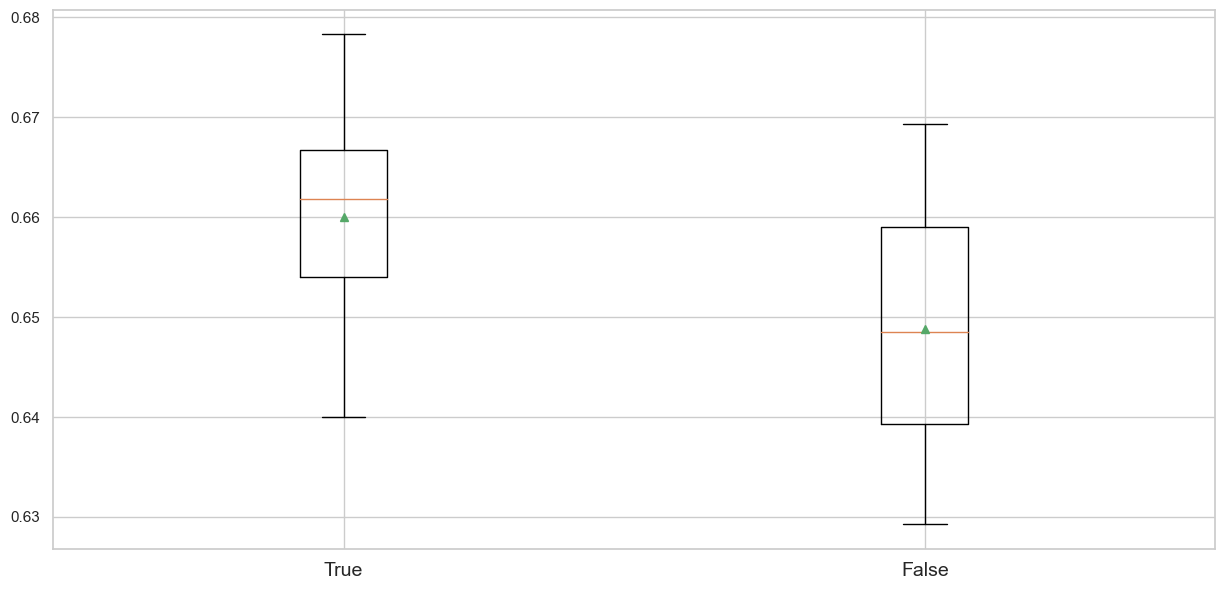

In [149]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 42)      
     return models

 models = get_models([True, False])
 return_results(models)

>0.2 0.677 (0.012)
>0.4 0.669 (0.012)
>0.6 0.667 (0.010)
>0.8 0.663 (0.013)
>None 0.660 (0.009)


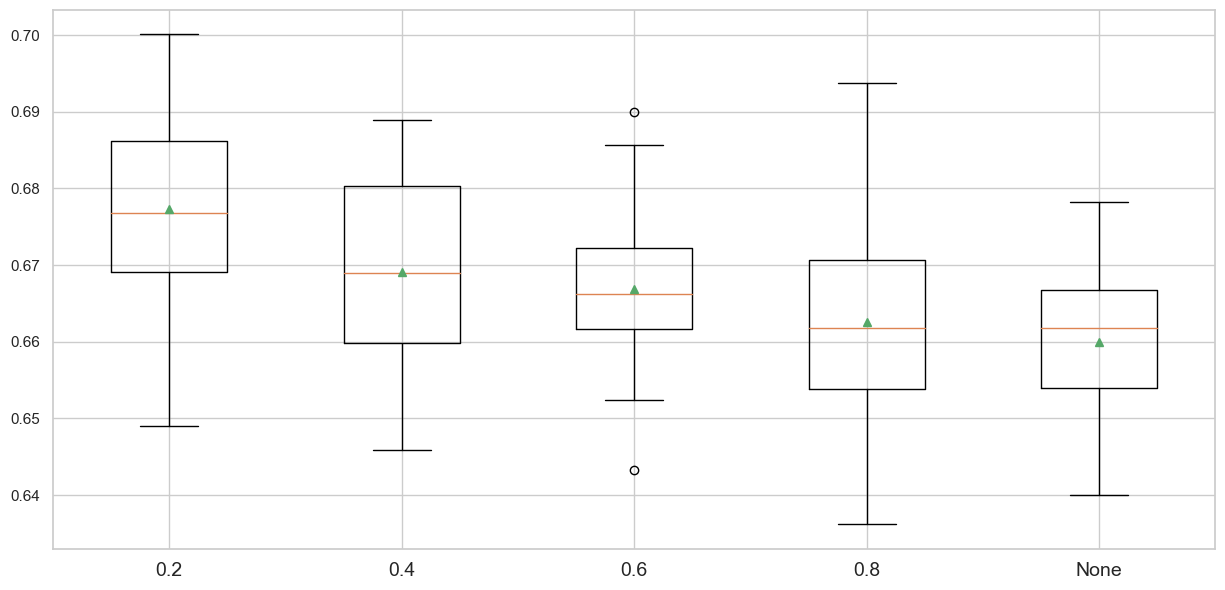

In [150]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = RandomForestClassifier(max_samples = value, random_state = 42)      
     return models

 models = get_models([0.2,0.4,0.6,0.8,None])
 return_results(models)

>1 0.662 (0.012)
>2 0.662 (0.012)
>4 0.672 (0.011)
>6 0.677 (0.009)
>8 0.681 (0.009)
>10 0.682 (0.010)
>None 0.660 (0.009)


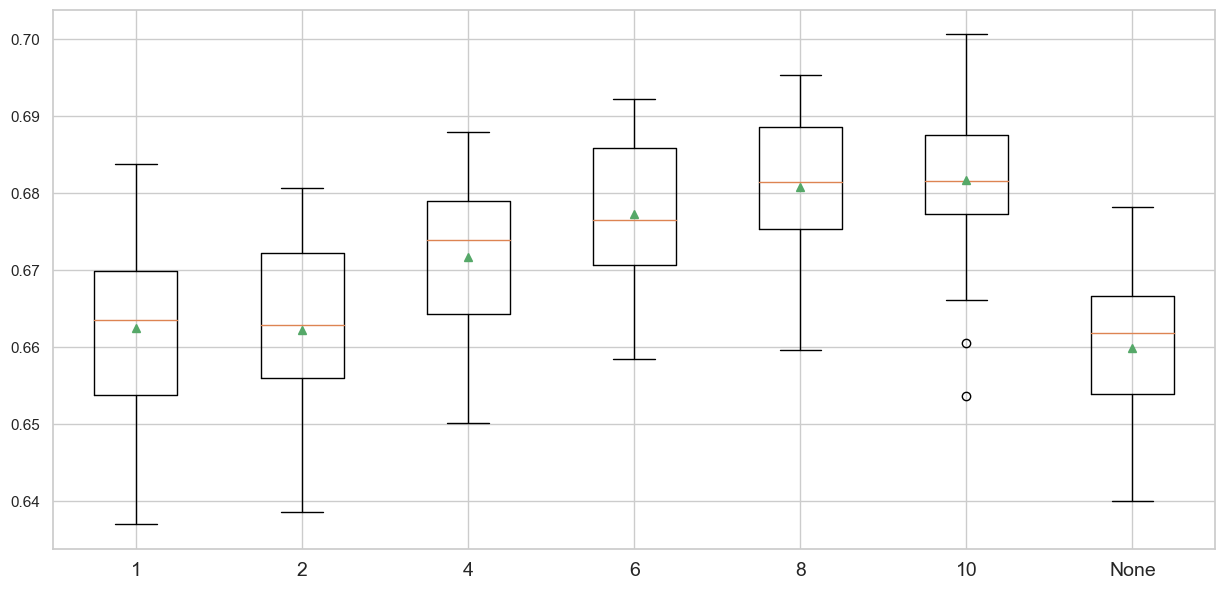

In [151]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 42)      
     return models

 models = get_models([1,2,4,6,8,10,None])
 return_results(models)

In [152]:

random_forest_under = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )
random_forest_under.fit(X_train_undersampled, y_train_undersampled)

y_train_rf_undersample = bagging_under.predict(X_train_undersampled)
y_pred_rf_undersample = bagging_under.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_rf_undersample))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_rf_undersample))
print('kaggle result: 0.2994 version 44' )


F1 Score to the Train dataset: 0.8363296754611254
F1 Score to the Validation dataset: 0.25612865267699547
kaggle result: 0.2994 version 44


### Gradient Boost

>0.001 0.671 (0.012)
>0.01 0.675 (0.009)
>0.1 0.680 (0.010)
>0.3 0.673 (0.009)
>0.5 0.667 (0.011)
>0.8 0.659 (0.013)
>1.0 0.652 (0.012)


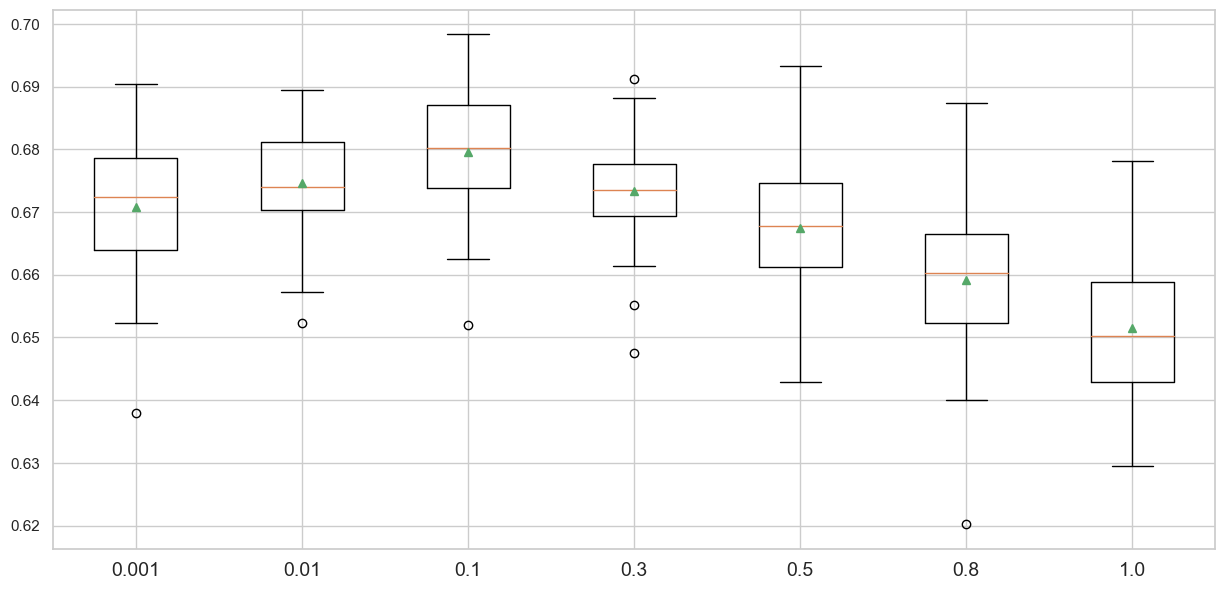

In [153]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 42)      
     return models

 models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
 return_results(models)

>2 0.671 (0.013)
>5 0.675 (0.009)
>10 0.674 (0.009)
>20 0.674 (0.009)
>30 0.677 (0.009)
>50 0.679 (0.009)
>100 0.680 (0.010)
>150 0.679 (0.010)
>200 0.678 (0.010)
>500 0.675 (0.010)


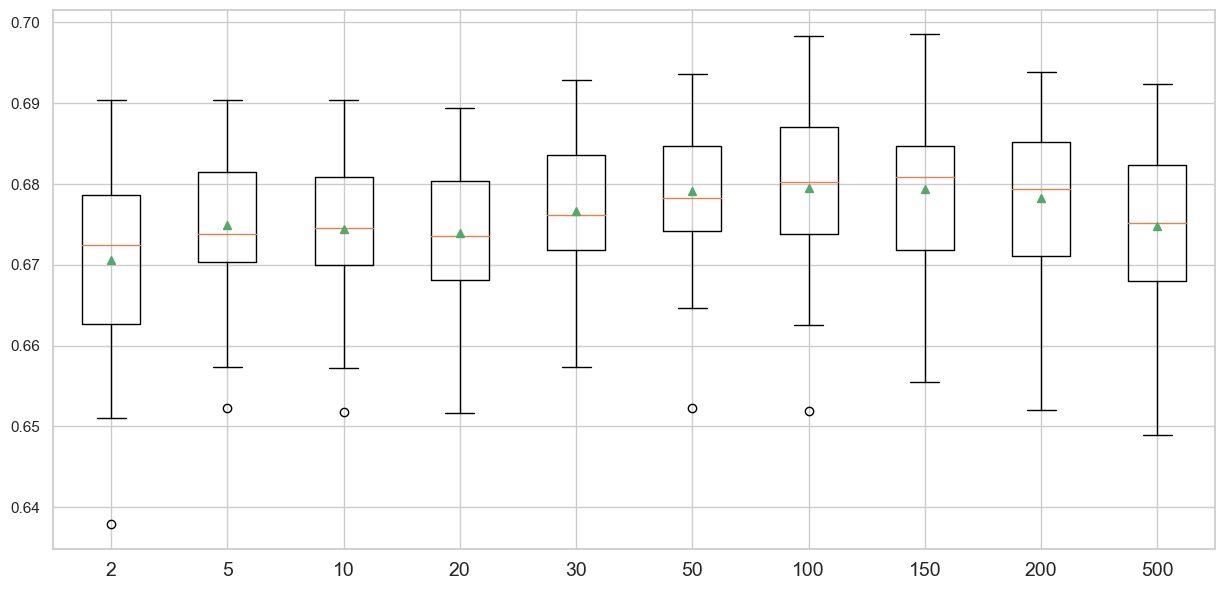

In [154]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 42)      
     return models

 models = get_models([2,5,10,20,30,50,100,150,200,500])
 return_results(models)

>0.2 0.676 (0.011)
>0.4 0.677 (0.010)
>0.6 0.679 (0.009)
>0.8 0.680 (0.009)
>1.0 0.680 (0.010)


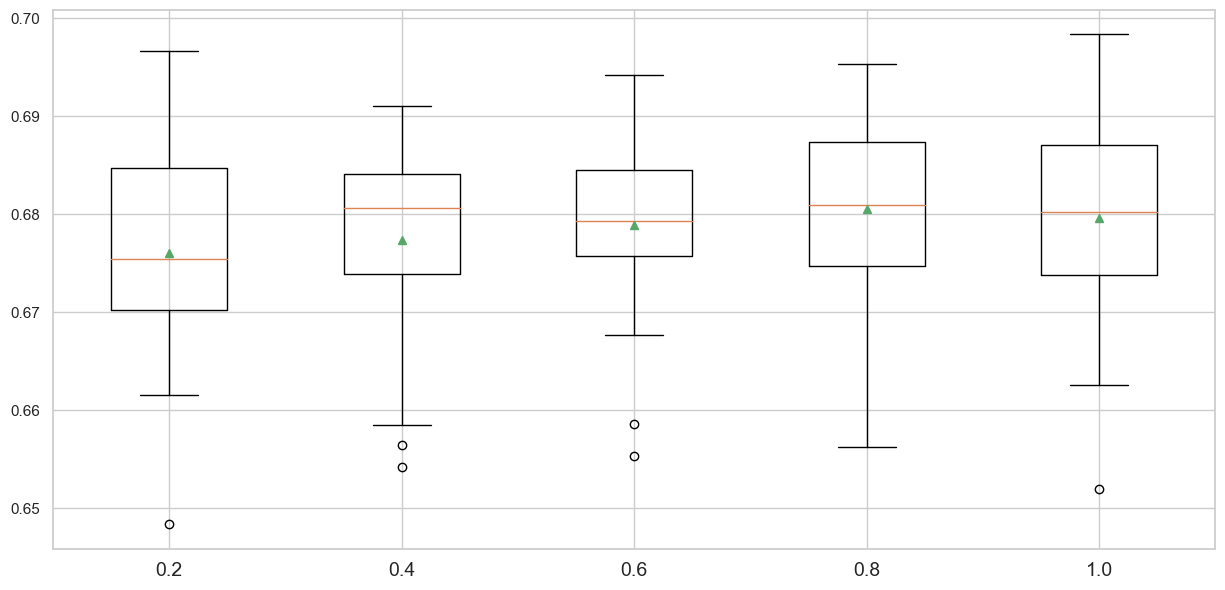

In [155]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 42)      
     return models

 models = get_models([0.2,0.4,0.6,0.8,1.0])
 return_results(models)

>2 0.677 (0.011)
>0.5 0.682 (0.010)
>sqrt 0.680 (0.012)
>log2 0.680 (0.012)
>None 0.680 (0.010)


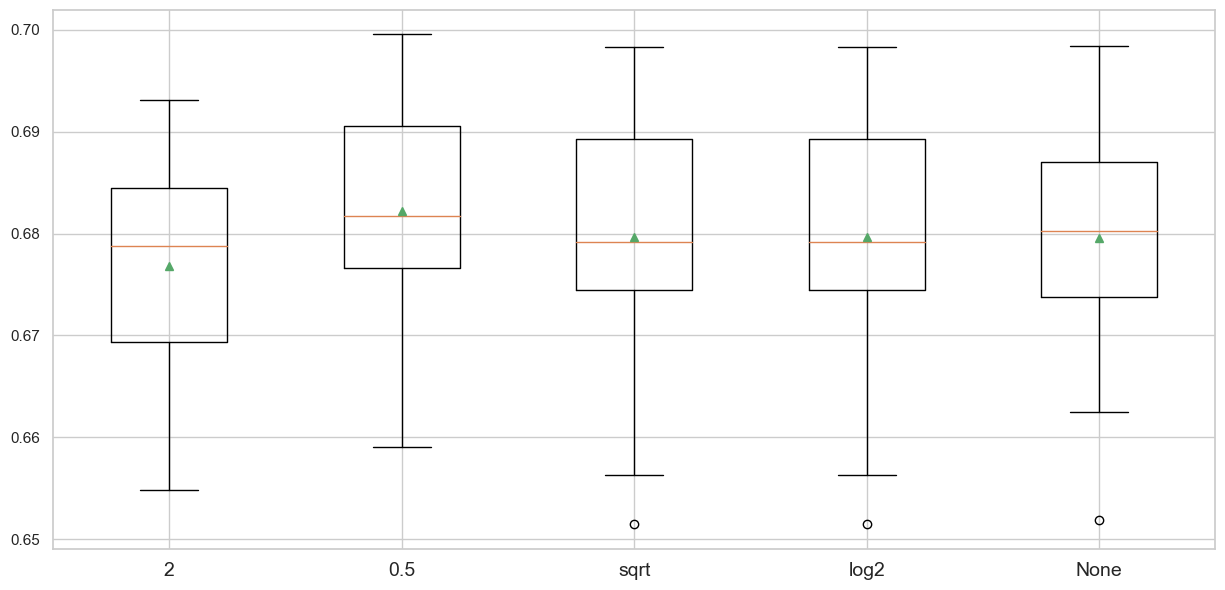

In [156]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 42)      
     return models

 models = get_models([2,0.5,'sqrt','log2',None])
 return_results(models)

In [157]:
gradient_boost_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)
gradient_boost_model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = gradient_boost_model.predict(X_val_new)
y_train_pred = gradient_boost_model.predict(X_train_undersampled)

# Evaluate the accuracy of the model
f1_ensemble = f1_score(y_val_binary, y_pred)
f1_train_ensemble = f1_score(y_train_undersampled, y_train_pred)

print('F1 Score on the Train dataset:', f1_train_ensemble)
print('F1 Score on the Validation dataset:', f1_ensemble)
print('kaggle result: 0.3016 version 54' )

# this hyperparameters were the ones that lead to the best overall f1 score

F1 Score on the Train dataset: 0.7027522935779817
F1 Score on the Validation dataset: 0.27350081037277146
kaggle result: 0.3016 version 54


### Stacking Classifier

In [158]:
 lr = LogisticRegression(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 nb = GaussianNB().fit(X_train_undersampled, y_train_undersampled)
 kn = KNeighborsClassifier().fit(X_train_undersampled, y_train_undersampled)
 dt = DecisionTreeClassifier(max_depth = 3, random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 nn = MLPClassifier(max_iter = 5000, random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 bg = BaggingClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 ab = AdaBoostClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 rf = RandomForestClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)
 gb = GradientBoostingClassifier(random_state = 10).fit(X_train_undersampled, y_train_undersampled)

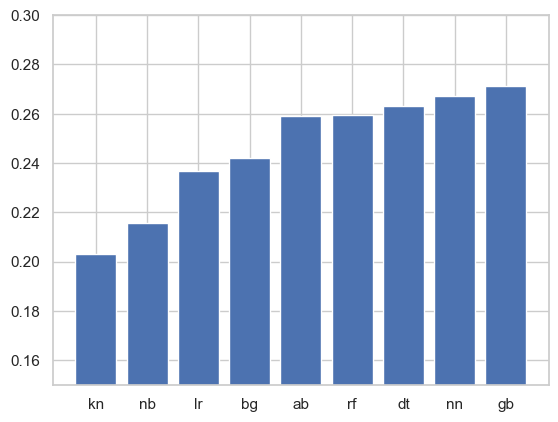

In [159]:
 accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
               f1_score(y_val_binary, nb.predict(X_val_new)), 
               f1_score(y_val_binary, kn.predict(X_val_new)),
               f1_score(y_val_binary, dt.predict(X_val_new)), 
               f1_score(y_val_binary, nn.predict(X_val_new)), 
               f1_score(y_val_binary, bg.predict(X_val_new)),
               f1_score(y_val_binary, ab.predict(X_val_new)), 
               f1_score(y_val_binary, rf.predict(X_val_new)), 
               f1_score(y_val_binary, gb.predict(X_val_new))]
 models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']
 data_tuples = list(zip(models,accuracies))
 data = pd.DataFrame(data_tuples)
 data = data.sort_values(1)
 plt.bar(data[0], data[1])
 plt.ylim(0.15,0.30)
 plt.show()

In [160]:
 estimators = [('gb', GradientBoostingClassifier(random_state = 42)),
               ('nn', MLPClassifier(max_iter=5000, random_state = 42))]

In [161]:
 st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

 # using the Logistic Regression as the final estimator because more complex models may increase the risk of overfitting

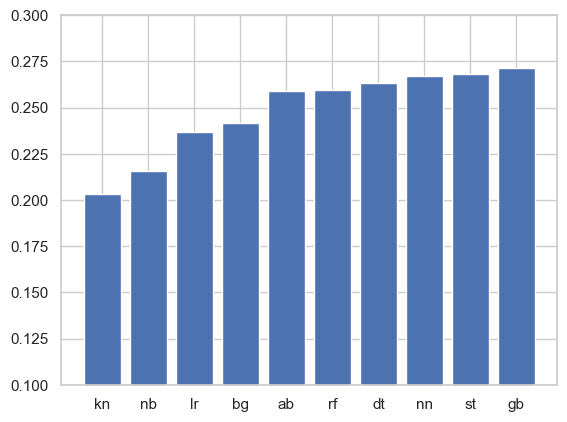

In [162]:
 accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
               f1_score(y_val_binary, nb.predict(X_val_new)), 
               f1_score(y_val_binary, kn.predict(X_val_new)),
               f1_score(y_val_binary, dt.predict(X_val_new)), 
               f1_score(y_val_binary, nn.predict(X_val_new)), 
               f1_score(y_val_binary, bg.predict(X_val_new)),
               f1_score(y_val_binary, ab.predict(X_val_new)), 
               f1_score(y_val_binary, rf.predict(X_val_new)), 
               f1_score(y_val_binary, gb.predict(X_val_new)),
               f1_score(y_val_binary, st.predict(X_val_new))]
 models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st']
 data_tuples = list(zip(models,accuracies))
 data = pd.DataFrame(data_tuples)
 data = data.sort_values(1)
 plt.bar(data[0], data[1])
 plt.ylim(0.1,0.3)
 plt.show()

In [163]:
estimators2 = [('gb', GradientBoostingClassifier(random_state = 42)),
              ('nn', MLPClassifier(max_iter=5000, random_state = 42)),
              ('dt', DecisionTreeClassifier(random_state = 42))]
st1 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

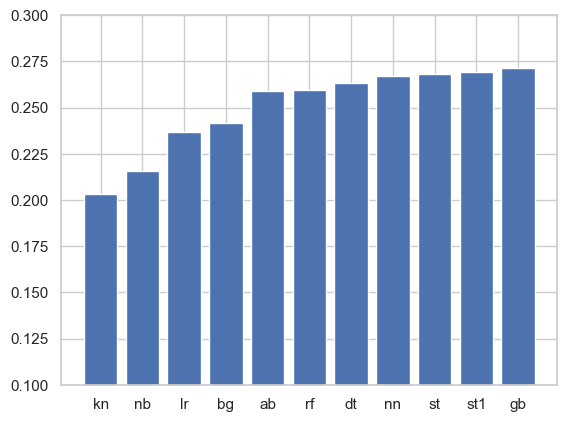

In [164]:
 accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
               f1_score(y_val_binary, nb.predict(X_val_new)), 
               f1_score(y_val_binary, kn.predict(X_val_new)),
               f1_score(y_val_binary, dt.predict(X_val_new)), 
               f1_score(y_val_binary, nn.predict(X_val_new)), 
               f1_score(y_val_binary, bg.predict(X_val_new)),
               f1_score(y_val_binary, ab.predict(X_val_new)), 
               f1_score(y_val_binary, rf.predict(X_val_new)), 
               f1_score(y_val_binary, gb.predict(X_val_new)),
               f1_score(y_val_binary, st.predict(X_val_new)),
               f1_score(y_val_binary, st1.predict(X_val_new))]
 models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st', 'st1']
 data_tuples = list(zip(models,accuracies))
 data = pd.DataFrame(data_tuples)
 data = data.sort_values(1)
 plt.bar(data[0], data[1])
 plt.ylim(0.1,0.3)
 plt.show()

In [165]:
 estimators3 = [('gb', GradientBoostingClassifier(random_state = 42)),
               ('nn', MLPClassifier(max_iter=5000, random_state = 42)),
               ('dt', DecisionTreeClassifier(random_state = 42)),
               ('ab', AdaBoostClassifier(random_state = 42))]
 st2 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train_undersampled, y_train_undersampled)

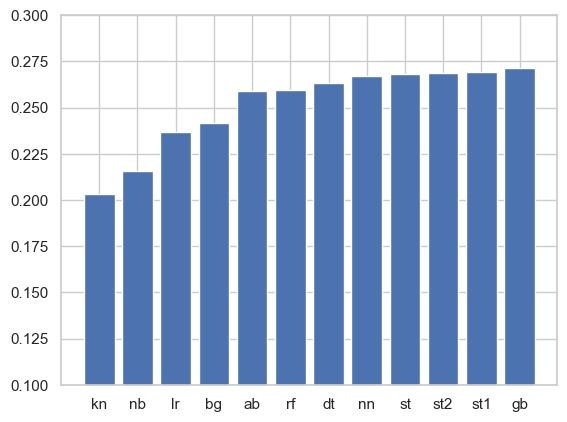

In [166]:
 accuracies = [f1_score(y_val_binary, lr.predict(X_val_new)), 
               f1_score(y_val_binary, nb.predict(X_val_new)), 
               f1_score(y_val_binary, kn.predict(X_val_new)),
               f1_score(y_val_binary, dt.predict(X_val_new)), 
               f1_score(y_val_binary, nn.predict(X_val_new)), 
               f1_score(y_val_binary, bg.predict(X_val_new)),
               f1_score(y_val_binary, ab.predict(X_val_new)), 
               f1_score(y_val_binary, rf.predict(X_val_new)), 
               f1_score(y_val_binary, gb.predict(X_val_new)),
               f1_score(y_val_binary, st.predict(X_val_new)),
               f1_score(y_val_binary, st1.predict(X_val_new)),
               f1_score(y_val_binary, st2.predict(X_val_new))]
              
 models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st', 'st1', 'st2']
 data_tuples = list(zip(models,accuracies))
 data = pd.DataFrame(data_tuples)
 data = data.sort_values(1)
 plt.bar(data[0], data[1])
 plt.ylim(0.1,0.3)
 plt.show()

In [167]:

stacking_model = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
stacking_model.fit(X_train_undersampled, y_train_undersampled)
y_train_stacking= stacking_model.predict(X_train_undersampled)
y_pred_stacking = stacking_model.predict(X_val_new)

print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_stacking))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred_stacking))
print('kaggle result:0.301 version58' )


F1 Score to the Train dataset: 0.6925271843911468
F1 Score to the Validation dataset: 0.26908150064683056
kaggle result:0.301 version58


### AdaBoost Classifier

>1 0.657 (0.011)
>2 0.669 (0.011)
>3 0.662 (0.009)
>4 0.645 (0.013)
>5 0.624 (0.014)
>6 0.613 (0.016)


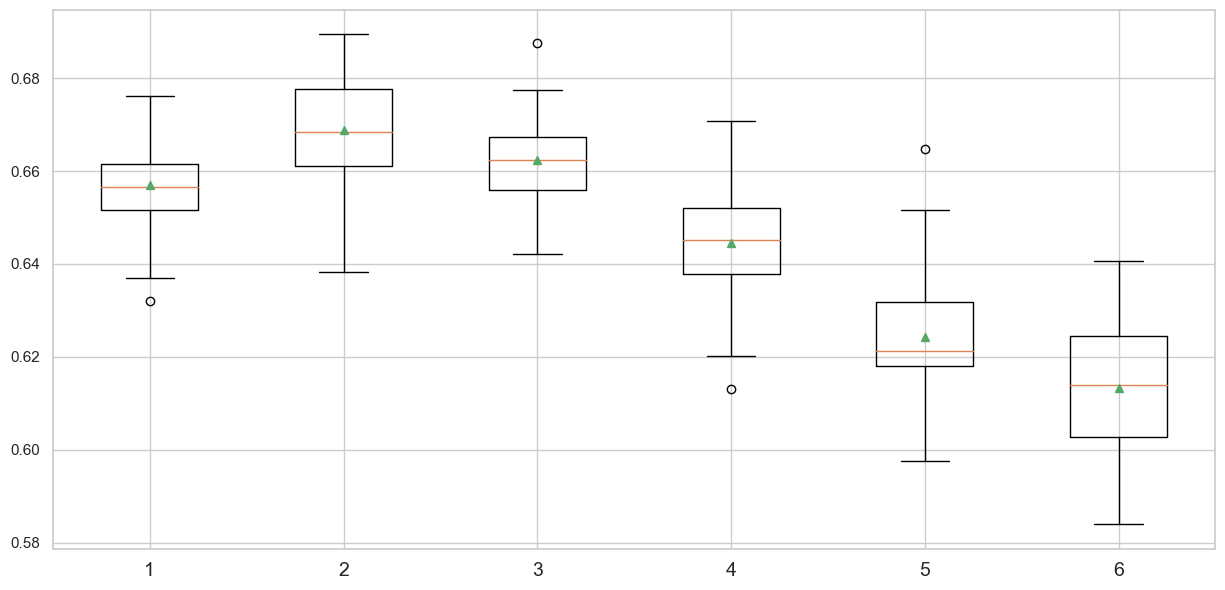

In [168]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=value), random_state = 42)      
     return models

 models = get_models([1,2,3,4,5,6])
 return_results(models)

>ad_LR 0.594 (0.012)
>ad_def 0.657 (0.011)


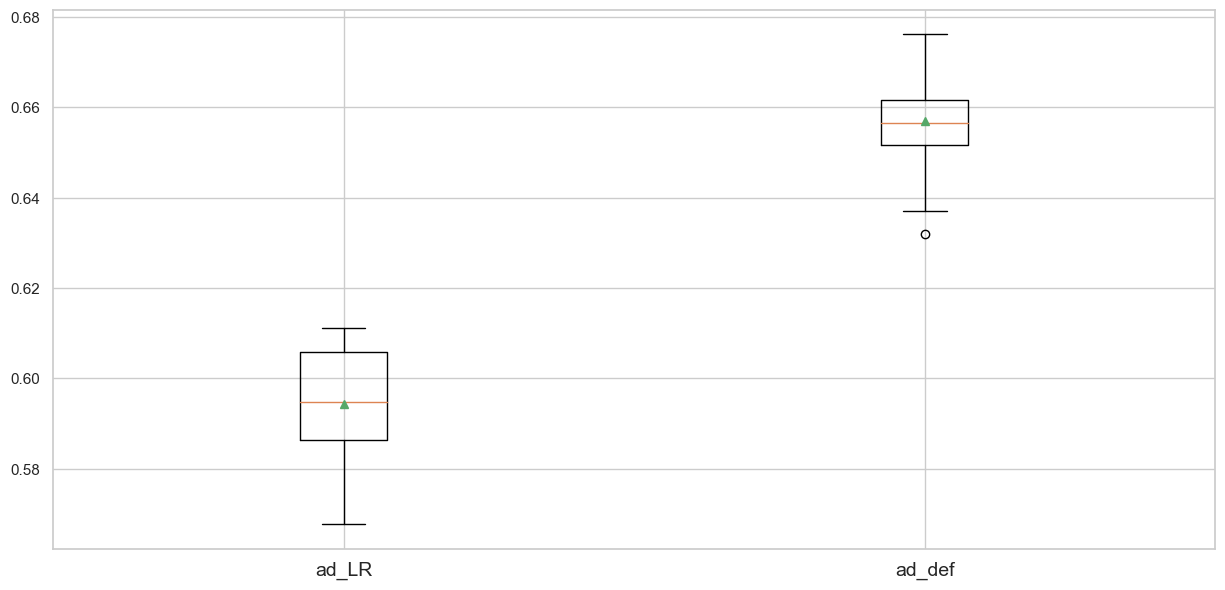

In [169]:
 def get_models():
     models = dict()
     models['ad_LR'] = AdaBoostClassifier(estimator = LogisticRegression(max_iter=500), random_state = 42)  
     models['ad_def'] = AdaBoostClassifier(random_state = 42)  
     return models

 models = get_models()
 return_results(models)

>2 0.657 (0.012)
>5 0.662 (0.013)
>10 0.660 (0.011)
>20 0.658 (0.011)
>30 0.657 (0.011)
>50 0.657 (0.011)
>100 0.657 (0.012)
>150 0.657 (0.012)


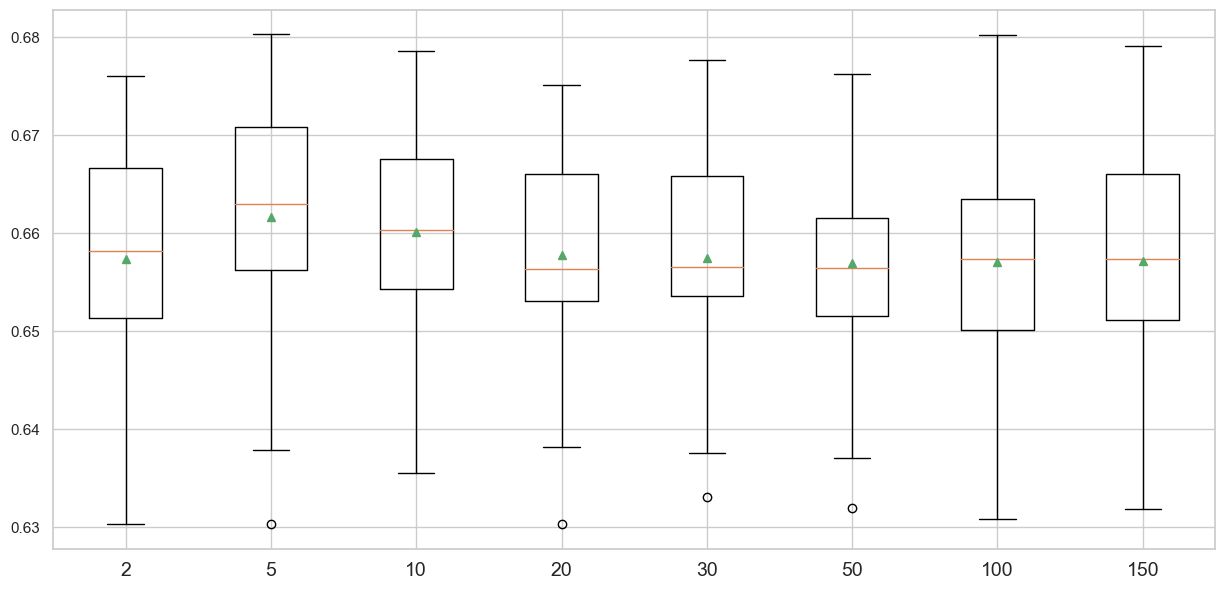

In [170]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 42)      
     return models

 models = get_models([2,5,10,20,30,50,100,150])
 return_results(models)

>0.1 0.657 (0.012)
>0.2 0.659 (0.011)
>0.3 0.658 (0.011)
>0.4 0.657 (0.011)
>0.5 0.656 (0.011)
>0.6 0.656 (0.011)
>0.7 0.654 (0.010)
>0.8 0.656 (0.011)
>0.9 0.657 (0.011)
>1.0 0.657 (0.011)


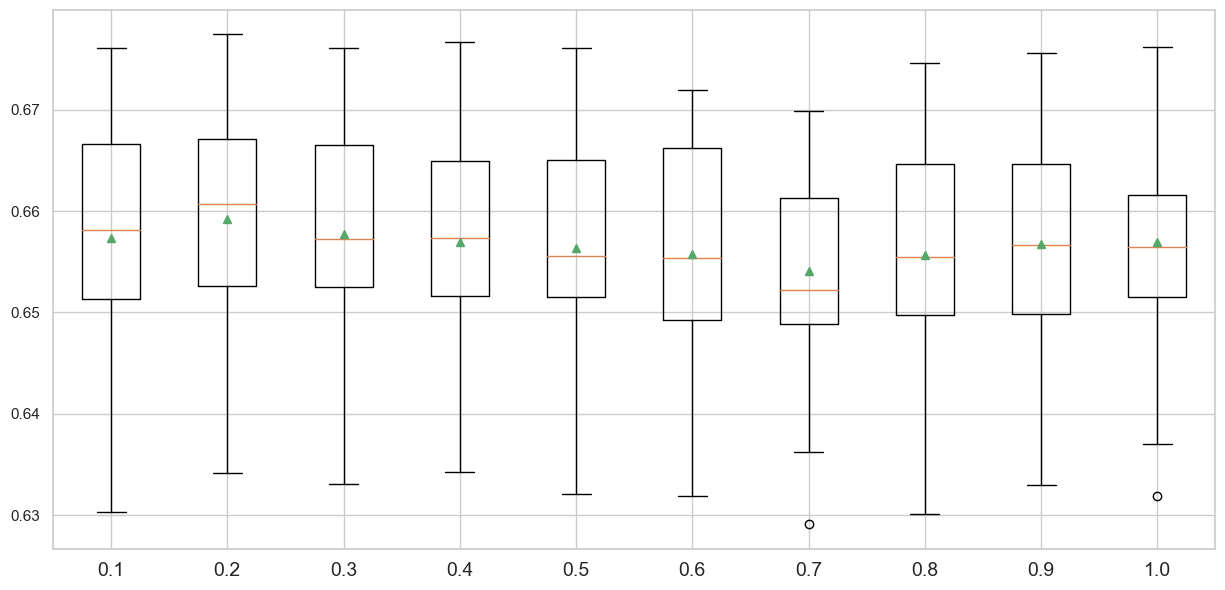

In [171]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 42)      
     return models

 models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
 return_results(models)

>0.1 0.657 (0.012)
>0.2 0.657 (0.012)
>0.3 0.657 (0.012)
>0.4 0.657 (0.012)
>0.5 0.660 (0.012)
>0.6 0.658 (0.012)
>0.7 0.656 (0.012)
>0.8 0.659 (0.011)
>0.9 0.659 (0.012)
>1.0 0.660 (0.011)


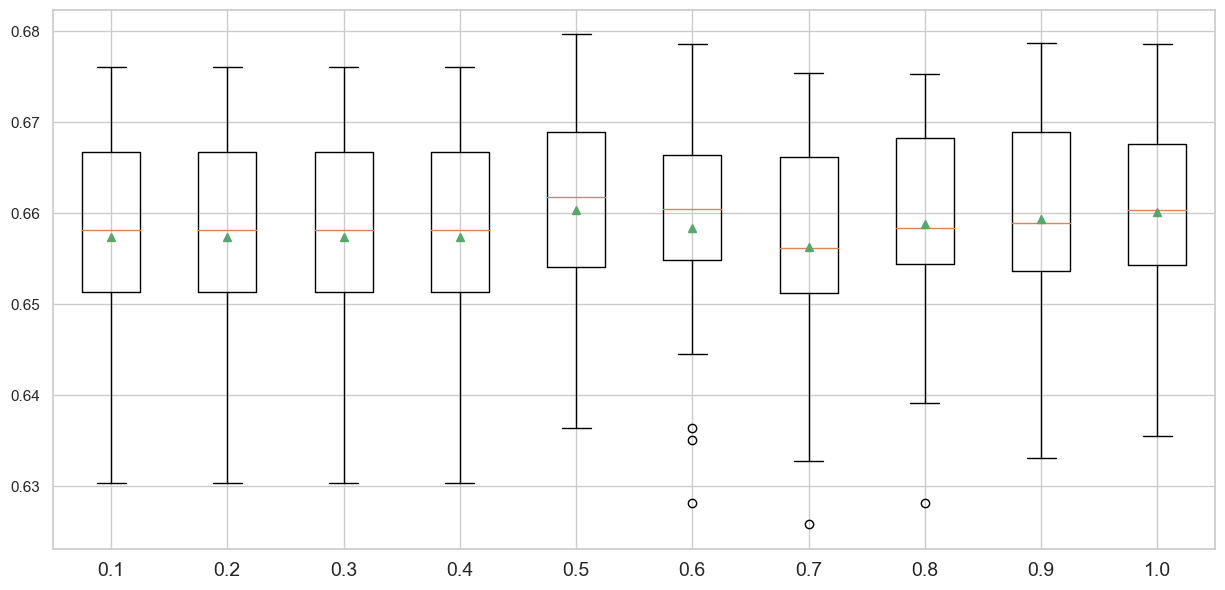

In [172]:
 def get_models(values):
     models = dict()
     for value in values:
         models[str(value)] = AdaBoostClassifier(learning_rate = value, n_estimators = 10, random_state = 42)      
     return models

 models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
 return_results(models)

As we can verify by the results, a smaller number of estimators could demand an higher learning rate - having only 10 estimators, the best learning rate increases to 0.9.

In [173]:
base_classifier =DecisionTreeClassifier(max_depth=2)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=10, learning_rate=1, algorithm= 'SAMME',random_state=42)
ada_boost_model.fit(X_train_undersampled, y_train_undersampled)
y_pred = ada_boost_model.predict(X_val_new)
y_train_ada= ada_boost_model.predict(X_train_undersampled)


print('\nF1 Score to the Train dataset:', f1_score(y_train_undersampled, y_train_ada))
print('F1 Score to the Validation dataset:', f1_score(y_val_binary, y_pred))
print('kaggle result: 0.3104 version57' )


F1 Score to the Train dataset: 0.6644105147174563
F1 Score to the Validation dataset: 0.2522699386503068
kaggle result: 0.3104 version57


### ROC Curve

In [174]:
 bagging_best = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators=100 , max_samples= 0.2, bootstrap = True, bootstrap_features = True, random_state = 42)
 random_forest_best = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )
 gradient_boost_best = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)
 stacking_model_best = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
 base_classifier_best =DecisionTreeClassifier(max_depth=2)
 ada_boost_best = AdaBoostClassifier(base_classifier_best, n_estimators=10, learning_rate=1, algorithm= 'SAMME',random_state=42)

In [175]:
 model_bg = bagging_best.fit(X_train_undersampled, y_train_undersampled)
 model_rf= random_forest_best.fit(X_train_undersampled, y_train_undersampled)
 model_gbo = gradient_boost_best.fit(X_train_undersampled, y_train_undersampled)
 model_st = stacking_model_best.fit(X_train_undersampled, y_train_undersampled)
 model_ab = ada_boost_best.fit(X_train_undersampled, y_train_undersampled)

In [176]:
 prob_modelBG = model_bg.predict_proba(X_val_new)
 prob_modelRF = model_rf.predict_proba(X_val_new)
 prob_modelGBO=  model_gbo.predict_proba(X_val_new)
 prob_modelST =  model_st.predict_proba(X_val_new)
 prob_modelAB =  model_ab.predict_proba(X_val_new)

In [177]:
 fpr_modelBG, tpr_modelBG, thresholds_modelBG = roc_curve(y_val_binary, prob_modelBG[:,1])
 fpr_modelRF, tpr_modelRF, thresholds_modelRF = roc_curve(y_true = y_val_binary, y_score = prob_modelRF[:,1])
 fpr_modelGBO, tpr_modelGBO, thresholds_modelGBO = roc_curve(y_val_binary, prob_modelGBO[:,1])
 fpr_modelST, tpr_modelST, thresholds_modelST = roc_curve(y_val_binary, prob_modelST[:,1])
 fpr_modelAB, tpr_modelAB, thresholds_modelAB = roc_curve(y_val_binary, prob_modelAB[:,1])

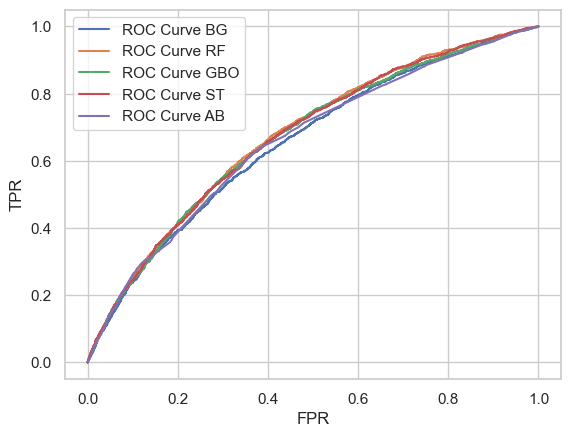

In [178]:
 plt.plot(fpr_modelBG, tpr_modelBG,label="ROC Curve BG")
 plt.plot(fpr_modelRF, tpr_modelRF,label="ROC Curve RF")
 plt.plot(fpr_modelGBO, tpr_modelGBO, label="ROC Curve GBO")
 plt.plot(fpr_modelST, tpr_modelST, label="ROC Curve ST")
 plt.plot(fpr_modelAB, tpr_modelAB, label="ROC Curve AB")
 plt.xlabel('FPR')
 plt.ylabel('TPR')
 plt.legend()
 plt.show()

# Precision and Recall

### Binary Undersampled

From the ROC curve done before we can see that our best models are DT and NN, so lets test the threshold

In [179]:
 ## Decision trees
 final_model_dt_under = DecisionTreeClassifier(max_depth=5, min_samples_leaf=91, min_samples_split=181, random_state=42)

 final_model_under = final_model_dt_under.fit(X_train_undersampled, y_train_undersampled)
 predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1111835  0.11600587 0.12331915 0.14514029 0.15366879
 0.1546862  0.15705968 0.17872604 0.18395443 0.18691352 0.20399188
 0.21333839 0.22129344 0.22381477 0.23404255 0.23359073 0.23480084
 0.23189734 0.20157068 0.24242424 0.25125628 0.28571429 0.21590909
 0.18644068 0.15       1.        ]
Best Threshold=0.443077, F-Score=0.271


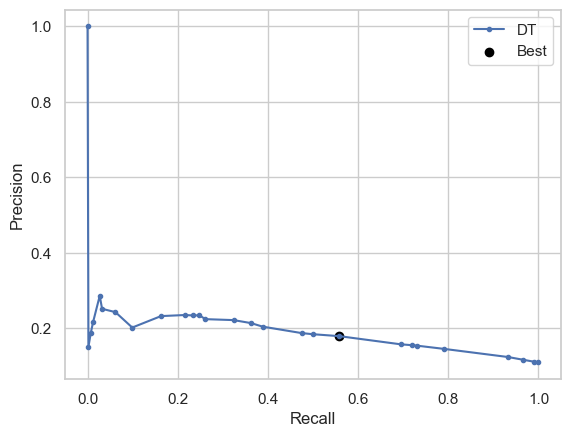

In [180]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='DT')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In [181]:
 ## MultiLayer Perceptron

 final_model_nn_under = MLPClassifier(hidden_layer_sizes = 8, activation='relu',solver='lbfgs',learning_rate='constant', learning_rate_init = 0.034, random_state=42, max_iter =100 )
 final_model_under = final_model_nn_under.fit(X_train_undersampled, y_train_undersampled)
 predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.524313, F-Score=0.272


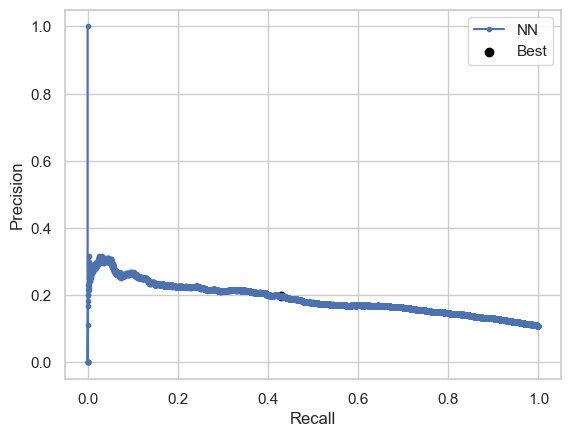

In [182]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='NN')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In [183]:
 ## Random Forest
 random_forest_best = RandomForestClassifier(n_estimators = 300, bootstrap= True,max_samples= 0.2, max_depth=8 )

 final_model_under = random_forest_best.fit(X_train_undersampled, y_train_undersampled)
 predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.5        1.         1.        ]
Best Threshold=0.486967, F-Score=0.276


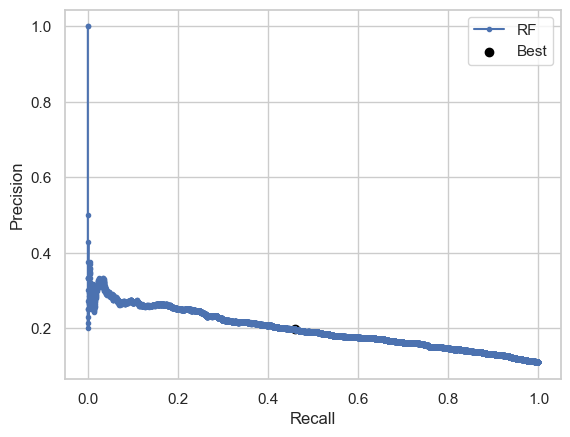

In [184]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='RF')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In [185]:
 ## Stacking
 stacking_model_best = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())

 final_model_under = stacking_model_best.fit(X_train_undersampled, y_train_undersampled)
 predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.451264, F-Score=0.277


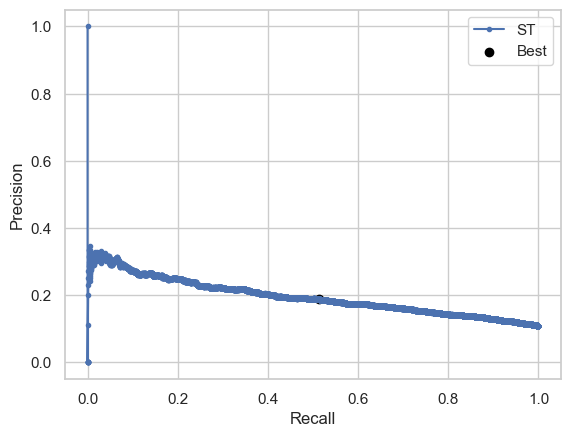

In [186]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='ST')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In [187]:
 ## Gradient Boost
 gradient_boost_best = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample = 0.6, max_features = None , random_state=15)

 final_model_under = gradient_boost_best.fit(X_train_undersampled, y_train_undersampled)
 predict_proba = final_model_under.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.495736, F-Score=0.277


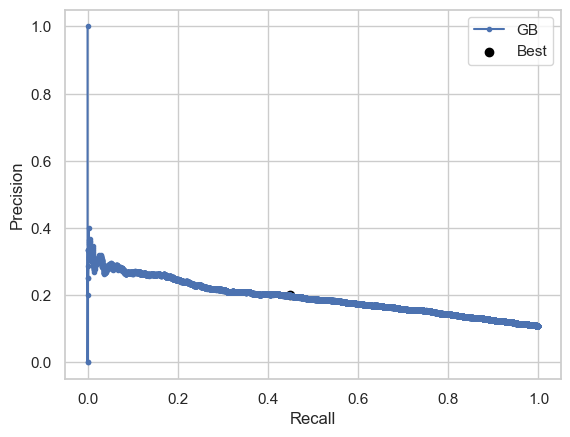

In [188]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='GB')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

### Binary Oversampled

From the ROC curve done before we can see that our best models are LR and NN, so lets test the threshold

In [189]:
 ## logistic regression

 final_model_lr_over =LogisticRegression(solver = 'saga', penalty= 'l1', C= 10.0)
 final_model_over = final_model_lr_over.fit(X_train_oversampled, y_train_oversampled)
 predict_proba = final_model_over.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.441307, F-Score=0.265


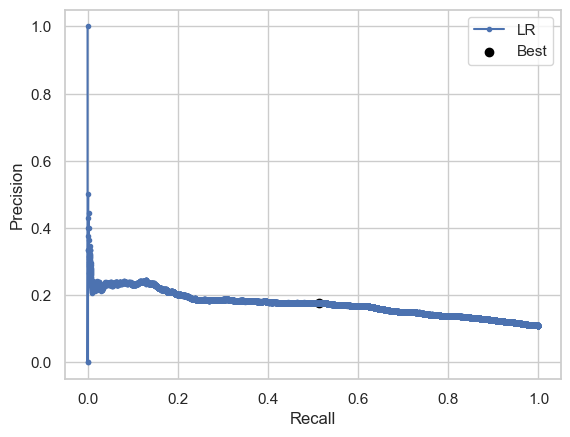

In [190]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='LR')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In [191]:
 # MultiLayer Perceptron
 final_model_nn_over = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.015, learning_rate='adaptive', solver='adam', activation='relu', max_iter=200, random_state=42)
 final_model_over = final_model_nn_over.fit(X_train_oversampled, y_train_oversampled)
 predict_proba = final_model_over.predict_proba(X_val_new)

[0.10899775 0.1090054  0.10901306 ... 0.         0.         1.        ]
Best Threshold=0.366263, F-Score=0.270


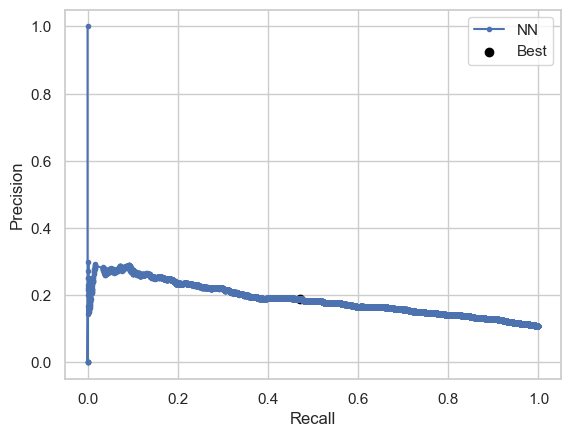

In [192]:
 precision, recall, thresholds = precision_recall_curve(y_val_binary, predict_proba[:,1])
 print(precision)
 # apply f1 score
 fscore = np.nan_to_num((2 * precision * recall) / (precision + recall))
 # locate the index of the largest f score
 ix = np.argmax(fscore)
 print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
 Thresh = thresholds[ix]
 plt.plot(recall, precision, marker='.', label='NN')
 plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.legend()
 plt.show()

In this case, we should prioritize high recall to avoid missing positive cases, even if it means lower precision


# Kaggle Submission

In [288]:
# best_dt_undersample.fit(X_train_undersampled, y_train_undersampled)
# predictions = best_dt_undersample.predict(X_test)

# # Assuming 'encounter_id' is the column containing the IDs of test samples
# submission_df = pd.DataFrame({'encounter_id': df_test['encounter_id'], 'readmitted_binary': predictions})
# submission_df['readmitted_binary'] = submission_df['readmitted_binary'].replace({0: 'No', 1: 'Yes'})

# # Save the submission file
# submission_df.to_csv('Group08_Version64.csv', index=False)

In [279]:
# best_nb_oversample.fit(X_train_oversampled, y_train_oversampled)
# predictions = best_nb_oversample.predict(X_test)

# # Assuming 'encounter_id' is the column containing the IDs of test samples
# submission_df = pd.DataFrame({'encounter_id': df_test['encounter_id'], 'readmitted_binary': predictions})
# submission_df['readmitted_binary'] = submission_df['readmitted_binary'].replace({0: 'No', 1: 'Yes'})

# # Save the submission file
# submission_df.to_csv('Group08_Version63.csv', index=False)